# Datos del estudiante
### Nombre: Jonnathan Campoberde
### Materia: Machine Learning
### Curso: Abril 2024-2025

# Introducción

En la presente actividad se usaran los pasos recomendados en la metodología KDD (Knowledge Discovery in Databases) con el objetivo de analizar los datos del Dengue de dos ciudades San Juan e Iquitos obtenidos de driven data para la competicion "DengAI: Predicting Disease Spread"  

# Fases del Proyecto según KDD

## Fase 1: Comprensión del Negocio y Definición del Problema

### Análisis del Contexto:
La fiebre del dengue es una enfermedad transmitida por mosquitos que ocurre en las partes tropicales y subtropicales del mundo. En casos leves, los síntomas son similares a los de la gripe: fiebre, erupción cutánea y dolor muscular y articular. En casos graves, la fiebre del dengue puede causar hemorragias graves, presión arterial baja e incluso la muerte.

Debido a que es transmitida por mosquitos, la dinámica de transmisión del dengue está relacionada con variables climáticas como la temperatura y la precipitación. Aunque la relación con el clima es compleja, un número creciente de científicos sostiene que el cambio climático probablemente provocará cambios en la distribución que tendrán importantes implicaciones para la salud pública en todo el mundo.

En los últimos años, la fiebre del dengue se ha estado propagando. Históricamente, la enfermedad ha sido más prevalente en el sudeste asiático y las islas del Pacífico. Hoy en día, muchos de los casi medio billón de casos por año ocurren en América Latina.

### Definición del Problema: 
El objetivo de DengAI es predecir el número de casos de dengue en una semana particular basado en datos climáticos y ubicación. Existe un conjunto de datos de entrenamiento y un conjunto de datos de prueba. MAE (Error Absoluto Medio) es una métrica utilizada para calcular la puntuación y el conjunto de datos de entrenamiento abarca 28 años de valores semanales para 2 ciudades (1456 semanas). Los datos de prueba son más pequeños y abarcan 5 y 3 años (dependiendo de la ciudad).

Esta problematica ha sido abordada debido a que, la fiebre del dengue es una enfermedad transmitida por mosquitos que ocurre en las partes tropicales y subtropicales del mundo. Debido a que es transmitida por mosquitos, la transmisión está relacionada con variables climáticas y meteorológicas.

## Fase 2: Comprensión de los Datos

## Recopilación de Datos
Los datos a ser usados a lo largo del analisis fueron proporcionados por driven data, los cuales contienen multiples caracteristicas de la ciudad, datos meteorologicos relacionadas a la problematica de los mosquitos del dengue, los mismos que se pueden encontrar en la siguiente enlace https://erdem.pl/2020/07/deng-ai-how-to-approach-data-science-competitions-eda

### Descripción de los datos

| Columna                           | Descripción                                                        |
|-----------------------------------|--------------------------------------------------------------------|
| city                              | Abreviaturas de ciudades: sj para San Juan e iq para Iquitos       |
| week_start_date                   | Fecha dada en formato yyyy-mm-dd                                   |
| station_max_temp_c                | Temperatura máxima                                                 |
| station_min_temp_c                | Temperatura mínima                                                 |
| station_avg_temp_c                | Temperatura promedio                                               |
| station_precip_mm                 | Precipitación total                                                |
| station_diur_temp_rng_c           | Rango de temperatura diurna                                        |
| precipitation_amt_mm              | Precipitación total                                                |
| reanalysis_sat_precip_amt_mm      | Precipitación total                                                |
| reanalysis_dew_point_temp_k       | Temperatura media del punto de rocío                               |
| reanalysis_air_temp_k             | Temperatura media del aire                                         |
| reanalysis_relative_humidity_percent | Humedad relativa media                                             |
| reanalysis_specific_humidity_g_per_kg | Humedad específica media                                           |
| reanalysis_precip_amt_kg_per_m2   | Precipitación total                                                |
| reanalysis_max_air_temp_k         | Temperatura máxima del aire                                        |
| reanalysis_min_air_temp_k         | Temperatura mínima del aire                                        |
| reanalysis_avg_temp_k             | Temperatura promedio del aire                                      |
| reanalysis_tdtr_k                 | Rango de temperatura diurna                                        |
| ndvi_se                           | Píxel al sureste del centroide de la ciudad                        |
| ndvi_sw                           | Píxel al suroeste del centroide de la ciudad                       |
| ndvi_ne                           | Píxel al noreste del centroide de la ciudad                        |
| ndvi_nw                           | Píxel al noroeste del centroide de la ciudad                       |


## Exploración de Datos Preliminar
Un análisis exploratorio para comprender la estructura y la calidad de los datos, identificar posibles sesgos y evaluar la idoneidad de los datos.

### Importación de librerías necesarias para el análisis

In [196]:
# Se importan las librerias necesarias y configuraciones globales para el desarrollo de la actividad
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.manifold import TSNE
from sklearn import cluster
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture

seed = 42


pd.set_option('display.max_columns', None)

In [197]:
#!pip install seaborn
#!pip install scipy
#!pip install scikit-learn
#!pip install statsmodels


In [198]:
#Cargar los datos del dataset al dataframe y mostrar los primeros 5 registros
dengue_df_features = pd.read_csv('../data/raw/dengue_features_train.csv')
dengue_df_labels = pd.read_csv('../data/raw/dengue_labels_train.csv')

#Mostrar los primeros 5 registros del dataframe
dengue_df = pd.DataFrame(pd.concat([dengue_df_features, dengue_df_labels], axis=1, join='inner'))
dengue_df = dengue_df.loc[:, ~dengue_df.columns.duplicated()]
#dengue_df = dengue_df_features 
dengue_df.head(50)

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6
5,sj,1990,23,1990-06-04,NaN,0.174850,0.254314,0.181743,9.58,299.630000,299.764286,295.851429,302.4,298.1,26.49,79.891429,9.58,17.212857,2.100000,28.114286,6.942857,34.4,23.9,39.1,2
6,sj,1990,24,1990-06-11,0.112900,0.092800,0.205071,0.210271,3.48,299.207143,299.221429,295.865714,301.3,297.7,38.60,82.000000,3.48,17.234286,2.042857,27.414286,6.771429,32.2,23.3,29.7,4
7,sj,1990,25,1990-06-18,0.072500,0.072500,0.151471,0.133029,151.12,299.591429,299.528571,296.531429,300.6,298.4,30.00,83.375714,151.12,17.977143,1.571429,28.371429,7.685714,33.9,22.8,21.1,5
8,sj,1990,26,1990-06-25,0.102450,0.146175,0.125571,0.123600,19.32,299.578571,299.557143,296.378571,302.1,297.7,37.51,82.768571,19.32,17.790000,1.885714,28.328571,7.385714,33.9,22.8,21.1,10
9,sj,1990,27,1990-07-02,NaN,0.121550,0.160683,0.202567,14.41,300.154286,300.278571,296.651429,302.3,298.7,28.40,81.281429,14.41,18.071429,2.014286,28.328571,6.514286,33.9,24.4,1.1,6


In [199]:
# Verificar si los índices son únicos
print("Verificar si los índices son únicos: ",dengue_df.index.is_unique)
# Verificar si las columnas son únicas
print("Verificar si las columnas son únicas:",dengue_df.columns.is_unique)


Verificar si los índices son únicos:  True
Verificar si las columnas son únicas: True


In [200]:
registros, columnas = (dengue_df.shape)
print("El dataset contiene {registros} registros y {columnas} columnas.".format(registros=registros,columnas=columnas))

El dataset contiene 1456 registros y 25 columnas.


In [201]:
#Se imprime todas las columnas del dataset
print('Las columnas del dataset: {columnas}'.format(columnas=','.join(dengue_df.columns.to_list())))

Las columnas del dataset: city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases


### Descripción de manera general de los tipos de variable para las columnas del dataframe 

In [202]:
dengue_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   city                                   1456 non-null   object 
 1   year                                   1456 non-null   int64  
 2   weekofyear                             1456 non-null   int64  
 3   week_start_date                        1456 non-null   object 
 4   ndvi_ne                                1262 non-null   float64
 5   ndvi_nw                                1404 non-null   float64
 6   ndvi_se                                1434 non-null   float64
 7   ndvi_sw                                1434 non-null   float64
 8   precipitation_amt_mm                   1443 non-null   float64
 9   reanalysis_air_temp_k                  1446 non-null   float64
 10  reanalysis_avg_temp_k                  1446 non-null   float64
 11  rean

In [203]:
#Se muestra la cantidad de registros por columa que tienen valores nulos
pd.DataFrame(dengue_df.isna().sum()).T.style.background_gradient()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,0,0,0,0,194,52,22,22,13,10,10,10,10,10,10,10,13,10,10,43,43,20,14,22,0


Se observa que el dataset tiene registros nulos en diversas columnas que se debe de analizar en las etapas posteriores

### Verificar la cantidad de registros duplicados

In [204]:
dengue_duplicated = dengue_df[dengue_df.duplicated()]
dengue_duplicated

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases


No existen registros con datos duplicados que deban ser eliminados del dataframe

### Descripción de los datos de manera general usando medidas estadisticas
Se muestra los datos como si fueran un mapa da calor para poder identificar de mejor manera los datos extremos para una variable

In [205]:
dengue_df.describe(percentiles=[.25, .50, .75, 1]).T.style.background_gradient()

,count,mean,std,min,25%,50%,75%,100%,max
year,1456.000000,2001.031593,5.408314,1990.000000,1997.000000,2002.000000,2005.000000,2010.000000,2010.000000
weekofyear,1456.000000,26.503434,15.019437,1.000000,13.750000,26.500000,39.250000,53.000000,53.000000
ndvi_ne,1262.000000,0.142294,0.140531,-0.406250,0.044950,0.128817,0.248483,0.508357,0.508357
ndvi_nw,1404.000000,0.130553,0.119999,-0.456100,0.049217,0.121429,0.216600,0.454429,0.454429
ndvi_se,1434.000000,0.203783,0.073860,-0.015533,0.155087,0.196050,0.248846,0.538314,0.538314
ndvi_sw,1434.000000,0.202305,0.083903,-0.063457,0.144209,0.189450,0.246982,0.546017,0.546017
precipitation_amt_mm,1443.000000,45.760388,43.715537,0.000000,9.800000,38.340000,70.235000,390.600000,390.600000
reanalysis_air_temp_k,1446.000000,298.701852,1.362420,294.635714,297.658929,298.646429,299.833571,302.200000,302.200000
reanalysis_avg_temp_k,1446.000000,299.225578,1.261715,294.892857,298.257143,299.289286,300.207143,302.928571,302.928571
reanalysis_dew_point_temp_k,1446.000000,295.246356,1.527810,289.642857,294.118929,295.640714,296.460000,298.450000,298.450000


# Fase 3: Preparación de Datos

## Limpieza de Datos
Llevar a cabo la limpieza de datos para manejar valores faltantes, outliers y datos inconsistentes utilizando técnicas avanzadas como imputación basada en modelos y detección de anomalías.

### Eliminar los datos duplicados del dataframe
En este caso el dataframe no contiene datos duplicados por lo que no es necesario realizar este paso en nuestro dataframe


### Analisis de los datos que tienen valores nulos
Se va a identificar los registros que tienen almenos un valor nulo en todas las columnas del dataframe

In [206]:
registros_con_nulos = dengue_df[dengue_df.isnull().any(axis=1)]
print('Existen {num_nulos} registros con algun valor nulo en el dataframe'.format(num_nulos=len(registros_con_nulos)))

Existen 257 registros con algun valor nulo en el dataframe


In [207]:
#Se reinicia los indices para ver de mejor manera los registros que tienen algun valor nulo
registros_con_nulos.head(25)

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
5,sj,1990,23,1990-06-04,NaN,0.174850,0.254314,0.181743,9.58,299.630000,299.764286,295.851429,302.4,298.1,26.49,79.891429,9.58,17.212857,2.100000,28.114286,6.942857,34.4,23.9,39.1,2
9,sj,1990,27,1990-07-02,NaN,0.121550,0.160683,0.202567,14.41,300.154286,300.278571,296.651429,302.3,298.7,28.40,81.281429,14.41,18.071429,2.014286,28.328571,6.514286,33.9,24.4,1.1,6
13,sj,1990,31,1990-07-30,NaN,0.247150,0.379700,0.381357,32.66,299.862857,299.950000,296.172857,303.0,298.3,34.60,80.584286,32.66,17.594286,2.585714,28.242857,8.085714,34.4,22.8,37.6,17
14,sj,1990,32,1990-08-06,NaN,0.064333,0.164443,0.138857,28.80,300.391429,300.478571,296.532857,302.5,298.8,20.00,79.650000,28.80,17.950000,2.328571,28.200000,7.557143,33.3,23.3,11.4,23
15,sj,1990,33,1990-08-13,NaN,0.128033,0.206957,0.168243,90.75,299.958571,299.957143,297.035714,302.6,298.5,101.90,84.178571,90.75,18.515714,1.857143,28.042857,6.685714,32.8,22.8,44.7,13
24,sj,1990,42,1990-10-15,NaN,0.070200,0.181617,0.165750,143.55,299.195714,299.307143,296.544286,301.5,297.5,279.60,85.621429,143.55,18.115714,1.871429,27.628571,7.400000,32.8,23.3,61.8,43
36,sj,1991,2,1991-01-08,NaN,0.100467,0.251900,0.137617,15.85,297.674286,297.828571,293.282857,299.3,295.8,26.33,76.628571,15.85,14.671429,1.885714,24.914286,6.314286,28.3,21.1,31.7,21
37,sj,1991,3,1991-01-15,NaN,0.293567,0.259943,0.217900,0.00,297.422857,297.657143,293.412857,299.3,296.1,27.40,78.500000,0.00,14.798571,2.000000,25.242857,6.571429,29.4,21.1,16.5,26
42,sj,1991,8,1991-02-19,NaN,0.209400,0.108433,0.119400,0.00,297.414286,297.614286,293.631429,300.1,295.8,26.20,79.740000,0.00,15.035714,2.571429,25.842857,8.471429,32.2,20.0,17.8,25
45,sj,1991,11,1991-03-12,NaN,NaN,0.213250,0.240543,0.00,297.431429,297.635714,293.335714,300.1,295.7,13.37,78.138571,0.00,14.787143,2.728571,25.928571,8.971429,31.7,20.6,3.6,17


Al visualizar los datos faltantes se observa que el campo `ndvi_ne` es el que más tiene datos faltantes y al tener 257 datos de un total de 1456 lo cual es una cantidad considerable por lo que se va a completar estos valores usando la interpolación basándose en los valores adyacentes.

In [208]:
df_interpolated = dengue_df.interpolate(method='spline', order=3)

C:\Users\jonat\AppData\Local\Temp\ipykernel_20432\629885240.py:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_interpolated = dengue_df.interpolate(method='spline', order=3)


In [209]:
#Verificar la existencia de registros con datos nulos
registros_con_nulos = df_interpolated[df_interpolated.isnull().any(axis=1)]
print('Existen {num_nulos} registros con algun valor nulo en el dataframe'.format(num_nulos=len(registros_con_nulos)))

Existen 0 registros con algun valor nulo en el dataframe


### Estandarizar la escala de los datos
La escala que se ocupa para medir la temperatura en el dataset en ciertas columas esta en kelvin y en otras esta en grados Celsius, por lo que se va a estandarizar todo para que nuestra temperatura este en grados Celsius.

### Conversión de Kelvin a Celsius:

$$ 
\text{Celsius} = \text{Kelvin} - 273.15 
$$

In [210]:
filtered_columns = ["reanalysis_air_temp_k", "reanalysis_avg_temp_k","reanalysis_dew_point_temp_k","reanalysis_max_air_temp_k","reanalysis_min_air_temp_k"]
#col_rename = {"reanalysis_air_temp_k":"reanalysis_air_temp_c", 
#              "reanalysis_avg_temp_k":"reanalysis_avg_temp_c",
#              "reanalysis_dew_point_temp_k": "reanalysis_dew_point_temp_c",
#              "reanalysis_max_air_temp_k":"reanalysis_max_air_temp_c",
#              "reanalysis_min_air_temp_k":"reanalysis_min_air_temp_c"}
df_temp_cleaned = df_interpolated.copy()
for column in filtered_columns:   
    df_temp_cleaned[column] = df_interpolated[column] - 273.15
#df_temp_cleaned.rename(columns=col_rename, inplace=True)
df_temp_cleaned.head(20)

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,24.422857,24.592857,19.264286,26.65,22.75,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,25.061429,25.292857,20.801429,27.75,23.25,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,25.631429,25.728571,22.284286,27.35,24.15,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,25.837143,26.078571,22.160000,28.25,23.85,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,26.368571,26.514286,22.671429,28.75,24.35,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6
5,sj,1990,23,1990-06-04,0.203844,0.174850,0.254314,0.181743,9.58,26.480000,26.614286,22.701429,29.25,24.95,26.49,79.891429,9.58,17.212857,2.100000,28.114286,6.942857,34.4,23.9,39.1,2
6,sj,1990,24,1990-06-11,0.112900,0.092800,0.205071,0.210271,3.48,26.057143,26.071429,22.715714,28.15,24.55,38.60,82.000000,3.48,17.234286,2.042857,27.414286,6.771429,32.2,23.3,29.7,4
7,sj,1990,25,1990-06-18,0.072500,0.072500,0.151471,0.133029,151.12,26.441429,26.378571,23.381429,27.45,25.25,30.00,83.375714,151.12,17.977143,1.571429,28.371429,7.685714,33.9,22.8,21.1,5
8,sj,1990,26,1990-06-25,0.102450,0.146175,0.125571,0.123600,19.32,26.428571,26.407143,23.228571,28.95,24.55,37.51,82.768571,19.32,17.790000,1.885714,28.328571,7.385714,33.9,22.8,21.1,10
9,sj,1990,27,1990-07-02,0.200170,0.121550,0.160683,0.202567,14.41,27.004286,27.128571,23.501429,29.15,25.55,28.40,81.281429,14.41,18.071429,2.014286,28.328571,6.514286,33.9,24.4,1.1,6


Una vez finalizada la limpieza basica de los datos se realiza el analisis de cada variable

### Analisis univariante de los datos

#### Analisis de cada una de las variables que conforman el dataset
Este analisis se lo realiza para conocer como esta la distribución de los datos y conocer la calidad de los mismos

In [211]:
outliers = df = pd.DataFrame(columns=['variable', 'num_outliers'])
def interpretar_skewness(df, column):
    """
    Esta función calcula e interpreta el skewness de una columna específica en un DataFrame.
    
    :param df: DataFrame que contiene los datos.
    :param columna: Nombre de la columna para la cual se desea calcular el skewness.
    :return: Una interpretación del skewness y recomendaciones.
    """
    # Calcular el skewness
    skewness = df[column].skew()
    resultado = f'2) Skewness: {skewness}\n *Interpretación: '
    
    # Interpretar el skewness
    if skewness == 0:
        resultado += "La distribución es simétrica.\n"
        recommendation = "Se puede usar técnicas estadísticas que asumen normalidad."
    elif skewness > 0:
        resultado += "La distribución tiene cola larga a la derecha (asimetría positiva).\n"
        recommendation = "Considerar usar la mediana en lugar de la media. " \
                        "Se debe de verifica si hay outliers en el lado derecho."
    else:
        resultado += "La distribución tiene cola larga a la izquierda (asimetría negativa).\n"
        recommendation = "Considerar  la mediana en lugar de la media. " \
                        "Se debe de verifica si hay outliers en el lado izquierdo."
    resultado +=" *Interpretación de la magnitud: "
    # Evaluar la magnitud del skewness
    if 0 < skewness < 0.5 or -0.5 < skewness < 0:
        resultado += "Asimetría baja. La distribución es casi simétrica.\n"
    elif 0.5 <= skewness < 1 or -1 < skewness <= -0.5:
        resultado += "Asimetría moderada. La distribución presenta cierta asimetría.\n"
    elif 1 <= skewness < 2 or -2 < skewness <= -1:
        resultado += "Asimetría alta. La distribución es significativamente sesgada.\n"
    else:
        resultado += "Asimetría muy alta. La distribución es extremadamente sesgada.\n"

    # Imprimir recomendaciones
    resultado += " *Recomendaciones: " + recommendation
    
    return resultado

def interpretar_kurtosis(df, column):
    """
    Esta función interpreta el skewness de una columna específica en un DataFrame.
    
    :param valor_kurtosis: valor de valor_kurtosis
    """
    valor_kurtosis =  df[column].kurtosis()
    resultado = f'3) Kurtosis: {valor_kurtosis}\n *Interpretación: '
    if 2.9 <= valor_kurtosis <= 3.1:
        resultado += "La distribución es mesocúrtica (similar a una normal)"
    elif valor_kurtosis > 3:
        if 3 < valor_kurtosis <= 4:
            resultado += "La distribución es leptocúrtica (colas más gruesas, algunos outliers)"
        else:
            resultado += "La distribución es leptocúrtica (colas muy gruesas, muchos outliers)"
    elif valor_kurtosis < 3:
        if 2 <= valor_kurtosis < 3:
            resultado += "La distribución es platicúrtica (colas más delgadas, pocos outliers)"
        else:
            resultado += "La distribución es platicúrtica (colas muy ligeras, valores extremos muy raros)"
        
    return resultado

def detectar_outliers_graphical(df, column,k=1.5):
    """
    Detecta outliers en un DataFrame utilizando dos métodos: IQR y Z-score.

    :param df: DataFrame de pandas
    :param columna: Nombre de la columna en la que se buscan outliers
    :return: DataFrame con outliers detectados por ambos métodos
    """
    
    # Método IQR
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - k*IQR
    limite_superior = Q3 + k*IQR

    # Identificar outliers usando IQR
    outliers_IQR =len(df[(df[column] < limite_inferior) | (df[column] > limite_superior)])
    outlier = {'variable':column,'num_outliers': outliers_IQR}
    return f"4) Se ha detectado {outliers_IQR} outliers en los datos", outlier

def analysis_numeric_colum(df,col,k=2,ylabel=None,xlabel=None,title_hist=None,title_bar=None):
    sns.set(font_scale=0.8)
    sns.set_style("white")
    #Crear un histograma para las variables numericas
    sns.histplot(df[col], bins=60)
    if (ylabel is not None):
        plt.ylabel(ylabel)
    if (xlabel is not None):
        plt.xlabel(xlabel)
    plt.title("Histograma de la variable {var}".format(var=col), fontsize=14)
    plt.tight_layout()        
    plt.show()
    
    #Para graficar el box plot
    sns.set(style="whitegrid")
    sns.boxplot(x=df[col])
    plt.title('Diagrama de caja de la variable {var}'.format(var=col))


    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()        
    plt.show()
    
    result = stats.anderson(df[col])
    message, outlier = detectar_outliers_graphical(df,col,k)

    print("***Resumen de la variable***")
    if result.statistic < result.critical_values[2]:
        print('1) Los datos provienen de una distribución normal al nivel de significancia del 5%.')
    else:
        print('1) Los datos no provienen de una distribución normal al nivel de significancia del 5%.')
    
    print(interpretar_skewness(df=df,column=col))
    print(interpretar_kurtosis(df=df, column=col))
    print(message)
    print("5) Datos resumidos de la variable")
    print(df[col].describe())
    return outlier

def detectar_outliers_var(df,input_columns,k=1.5):
    outliers = pd.DataFrame(columns=df.columns)
    
    for col in input_columns:
        if pd.api.types.is_numeric_dtype(df[col]):
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            
            limite_inferior = Q1 - k * IQR
            limite_superior = Q3 + k * IQR
            
            outliers_col = df[(df[col] < limite_inferior) | (df[col] > limite_superior)]
            outliers = pd.concat([outliers, outliers_col], axis=0)
    
    return outliers.drop_duplicates()


def eliminar_outliers_iqr_multi(df, columns, k=1.5):
    df_filtrado = df.copy()
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - k * IQR
        upper_bound = Q3 + k * IQR
        
        # Filtrar filas que no son outliers en la columna actual
        df_filtrado = df_filtrado[(df_filtrado[column] >= lower_bound) & (df_filtrado[column] <= upper_bound)]
    
    return df_filtrado

def generate_boxplot(data, numerical_cols, title = 'Distribución de Variables Numéricas'):
    # Generar box plots para las variables numéricas
    # Estilo y tamaño del gráfico
    plt.figure(figsize=(8, 6))
    sns.set(style="whitegrid")  # Estilo de fondo del gráficogenerate_boxplot

    # Crear el box plot utilizando Seaborn para una apariencia más elegante
    sns.boxplot(data=data[numerical_cols])
    plt.title(title, fontsize=16, fontweight='bold')
    plt.xlabel('Variables', fontsize=14)
    plt.ylabel('Valor', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()

    # Mostrar el gráfico
    plt.show()

#### Analizando la variable ndvi_ne

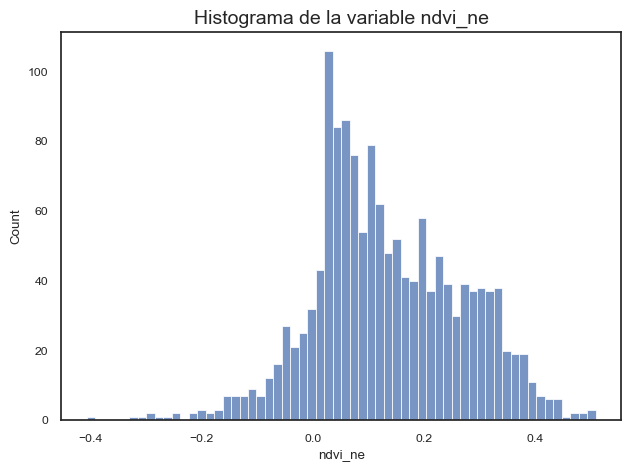

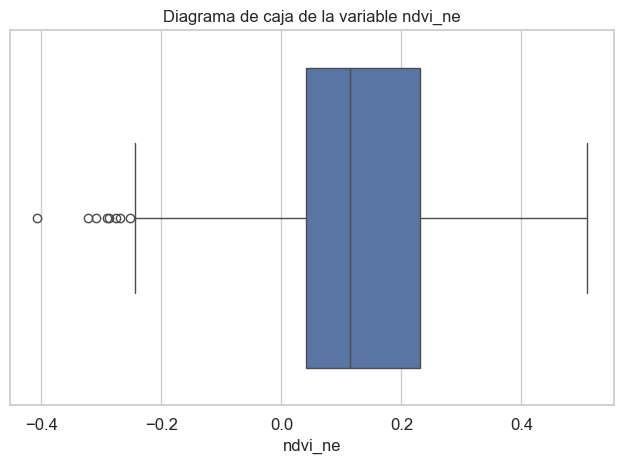

***Resumen de la variable***
1) Los datos no provienen de una distribución normal al nivel de significancia del 5%.
2) Skewness: 0.04902930880558473
 *Interpretación: La distribución tiene cola larga a la derecha (asimetría positiva).
 *Interpretación de la magnitud: Asimetría baja. La distribución es casi simétrica.
 *Recomendaciones: Considerar usar la mediana en lugar de la media. Se debe de verifica si hay outliers en el lado derecho.
3) Kurtosis: 0.021196683249037562
 *Interpretación: La distribución es platicúrtica (colas muy ligeras, valores extremos muy raros)
4) Se ha detectado 1 outliers en los datos
5) Datos resumidos de la variable
count    1456.000000
mean        0.133591
std         0.134003
min        -0.406250
25%         0.040769
50%         0.114146
75%         0.230793
max         0.508357
Name: ndvi_ne, dtype: float64


In [212]:
outlier = analysis_numeric_colum(df=df_temp_cleaned,col='ndvi_ne')
outliers = pd.concat([outliers, pd.DataFrame(outlier,index=[0])], ignore_index=True)

#### Analizando la variable ndvi_nw

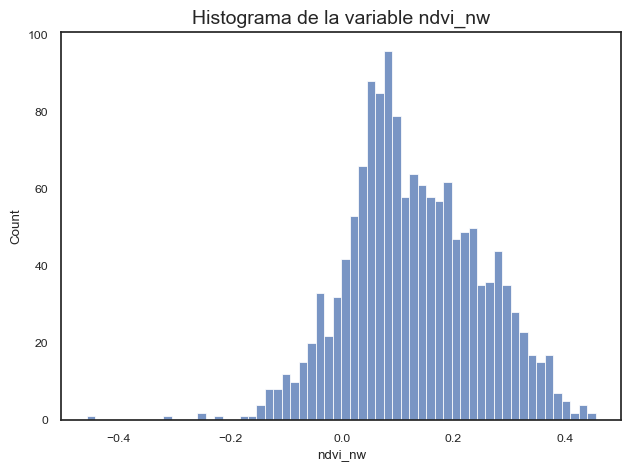

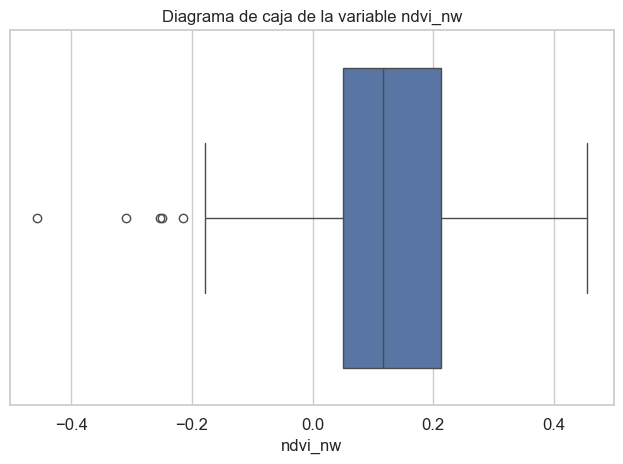

***Resumen de la variable***
1) Los datos no provienen de una distribución normal al nivel de significancia del 5%.
2) Skewness: 0.021486786487979442
 *Interpretación: La distribución tiene cola larga a la derecha (asimetría positiva).
 *Interpretación de la magnitud: Asimetría baja. La distribución es casi simétrica.
 *Recomendaciones: Considerar usar la mediana en lugar de la media. Se debe de verifica si hay outliers en el lado derecho.
3) Kurtosis: 0.12526162964655763
 *Interpretación: La distribución es platicúrtica (colas muy ligeras, valores extremos muy raros)
4) Se ha detectado 2 outliers en los datos
5) Datos resumidos de la variable
count    1456.000000
mean        0.129295
std         0.118325
min        -0.456100
25%         0.050145
50%         0.117475
75%         0.212725
max         0.454429
Name: ndvi_nw, dtype: float64


In [213]:
outlier = analysis_numeric_colum(df=df_temp_cleaned,col='ndvi_nw')
outliers = pd.concat([outliers, pd.DataFrame(outlier,index=[0])], ignore_index=True)

#### Analizando la variable ndvi_sw

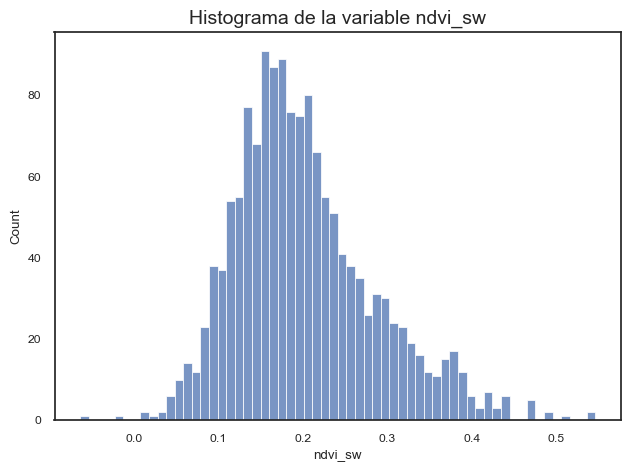

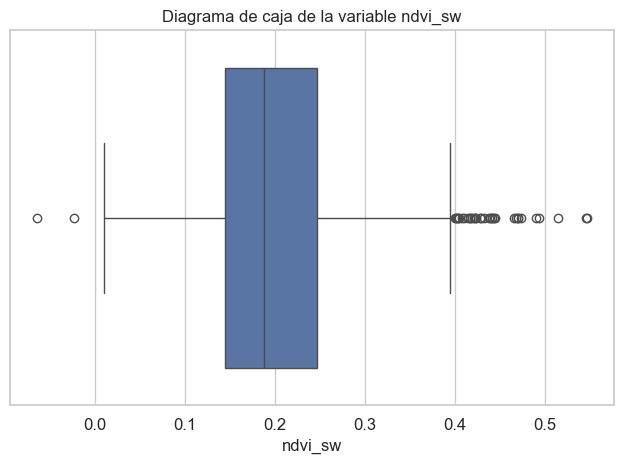

***Resumen de la variable***
1) Los datos no provienen de una distribución normal al nivel de significancia del 5%.
2) Skewness: 0.7705351953977058
 *Interpretación: La distribución tiene cola larga a la derecha (asimetría positiva).
 *Interpretación de la magnitud: Asimetría moderada. La distribución presenta cierta asimetría.
 *Recomendaciones: Considerar usar la mediana en lugar de la media. Se debe de verifica si hay outliers en el lado derecho.
3) Kurtosis: 0.7529017799049478
 *Interpretación: La distribución es platicúrtica (colas muy ligeras, valores extremos muy raros)
4) Se ha detectado 11 outliers en los datos
5) Datos resumidos de la variable
count    1456.000000
mean        0.201871
std         0.083444
min        -0.063457
25%         0.144718
50%         0.187779
75%         0.246775
max         0.546017
Name: ndvi_sw, dtype: float64


In [214]:
outlier = analysis_numeric_colum(df=df_temp_cleaned,col='ndvi_sw')
outliers = pd.concat([outliers, pd.DataFrame(outlier,index=[0])], ignore_index=True)

#### Analizando la variable precipitation_amt_mm

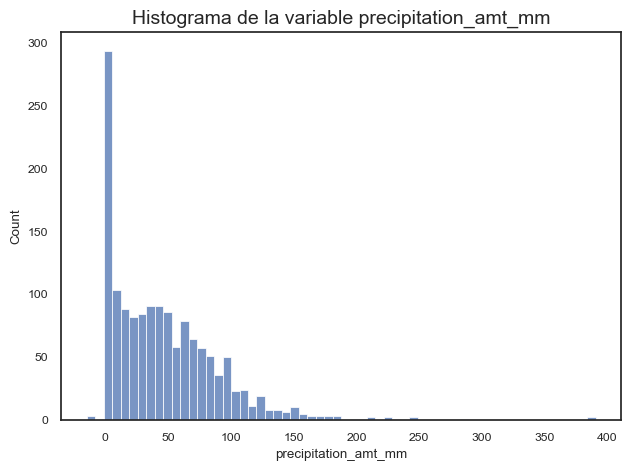

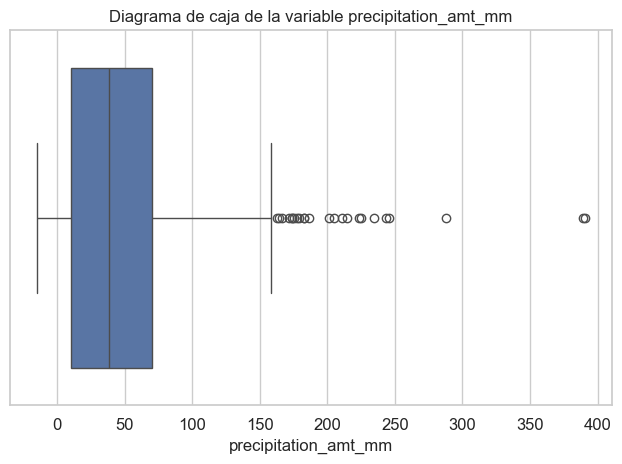

***Resumen de la variable***
1) Los datos no provienen de una distribución normal al nivel de significancia del 5%.
2) Skewness: 1.7213672260632218
 *Interpretación: La distribución tiene cola larga a la derecha (asimetría positiva).
 *Interpretación de la magnitud: Asimetría alta. La distribución es significativamente sesgada.
 *Recomendaciones: Considerar usar la mediana en lugar de la media. Se debe de verifica si hay outliers en el lado derecho.
3) Kurtosis: 6.674145793221134
 *Interpretación: La distribución es leptocúrtica (colas muy gruesas, muchos outliers)
4) Se ha detectado 12 outliers en los datos
5) Datos resumidos de la variable
count    1456.000000
mean       45.748840
std        43.776144
min       -14.802763
25%         9.760000
50%        38.475000
75%        70.227500
max       390.600000
Name: precipitation_amt_mm, dtype: float64


In [215]:
outlier = analysis_numeric_colum(df=df_temp_cleaned,col='precipitation_amt_mm')
outliers = pd.concat([outliers, pd.DataFrame(outlier,index=[0])], ignore_index=True)

#### Analizando la variable reanalysis_air_temp_k

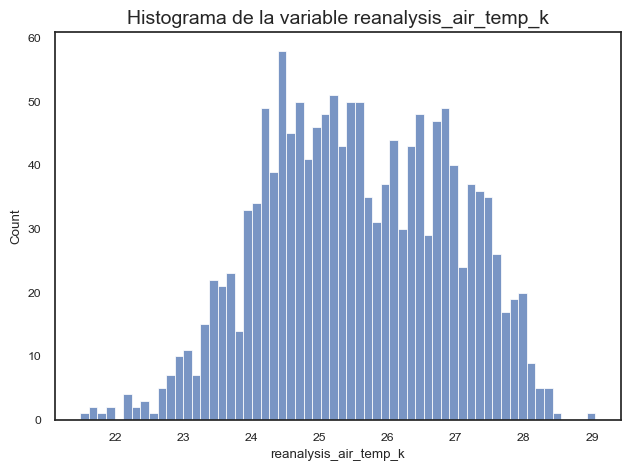

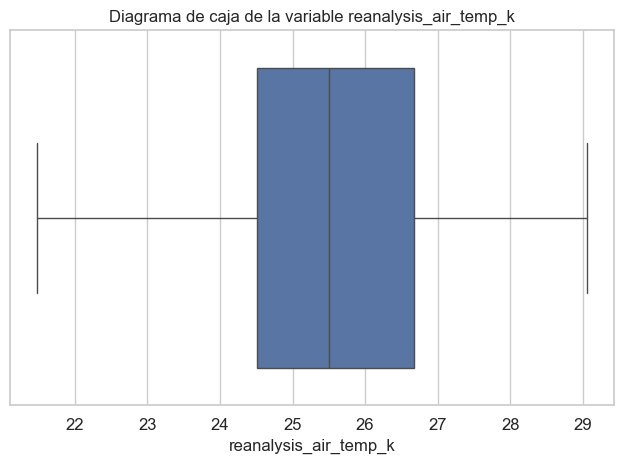

***Resumen de la variable***
1) Los datos no provienen de una distribución normal al nivel de significancia del 5%.
2) Skewness: -0.08013147232808118
 *Interpretación: La distribución tiene cola larga a la izquierda (asimetría negativa).
 *Interpretación de la magnitud: Asimetría baja. La distribución es casi simétrica.
 *Recomendaciones: Considerar  la mediana en lugar de la media. Se debe de verifica si hay outliers en el lado izquierdo.
3) Kurtosis: -0.6706848219886123
 *Interpretación: La distribución es platicúrtica (colas muy ligeras, valores extremos muy raros)
4) Se ha detectado 0 outliers en los datos
5) Datos resumidos de la variable
count    1456.000000
mean       25.551192
std         1.358505
min        21.485714
25%        24.512143
50%        25.496429
75%        26.677500
max        29.050000
Name: reanalysis_air_temp_k, dtype: float64


In [216]:
outlier = analysis_numeric_colum(df=df_temp_cleaned,col='reanalysis_air_temp_k')
outliers = pd.concat([outliers, pd.DataFrame(outlier,index=[0])], ignore_index=True)

#### Analizando la variable reanalysis_avg_temp_k

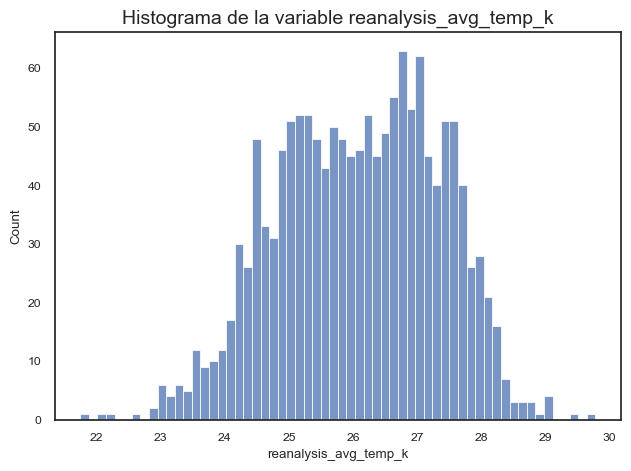

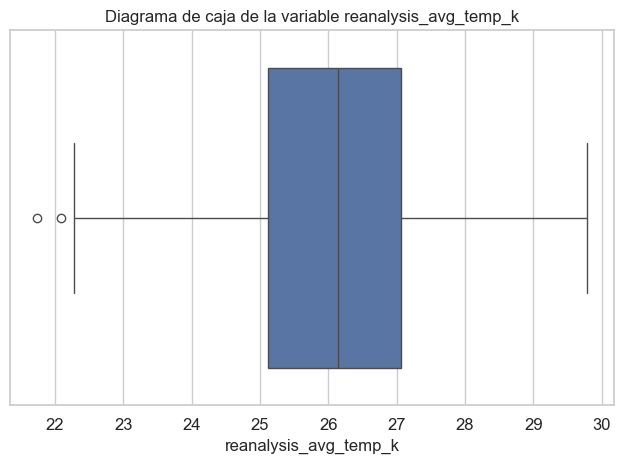

***Resumen de la variable***
1) Los datos no provienen de una distribución normal al nivel de significancia del 5%.
2) Skewness: -0.18926156149609807
 *Interpretación: La distribución tiene cola larga a la izquierda (asimetría negativa).
 *Interpretación de la magnitud: Asimetría baja. La distribución es casi simétrica.
 *Recomendaciones: Considerar  la mediana en lugar de la media. Se debe de verifica si hay outliers en el lado izquierdo.
3) Kurtosis: -0.519421763636938
 *Interpretación: La distribución es platicúrtica (colas muy ligeras, valores extremos muy raros)
4) Se ha detectado 0 outliers en los datos
5) Datos resumidos de la variable
count    1456.000000
mean       26.075521
std         1.258295
min        21.742857
25%        25.114286
50%        26.139286
75%        27.057143
max        29.778571
Name: reanalysis_avg_temp_k, dtype: float64


In [217]:
outlier = analysis_numeric_colum(df=df_temp_cleaned,col='reanalysis_avg_temp_k')
outliers = pd.concat([outliers, pd.DataFrame(outlier,index=[0])], ignore_index=True)

#### Analizando la variable reanalysis_dew_point_temp_k

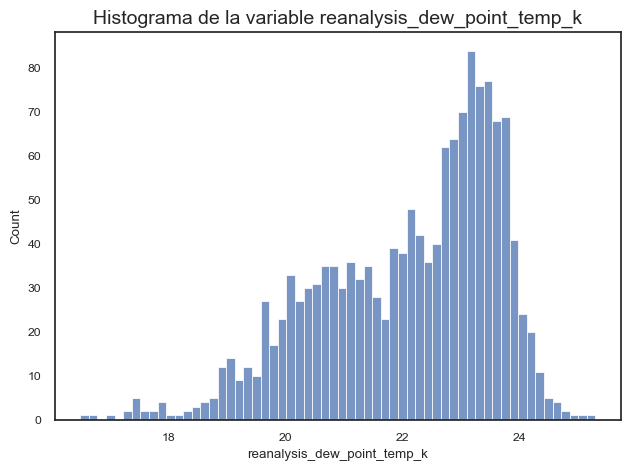

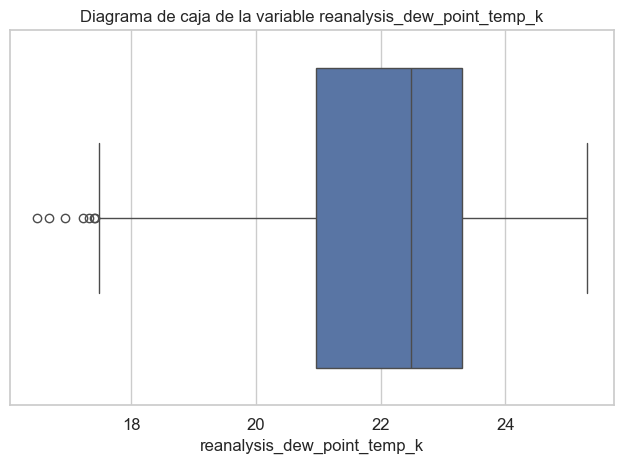

***Resumen de la variable***
1) Los datos no provienen de una distribución normal al nivel de significancia del 5%.
2) Skewness: -0.719929976970776
 *Interpretación: La distribución tiene cola larga a la izquierda (asimetría negativa).
 *Interpretación de la magnitud: Asimetría moderada. La distribución presenta cierta asimetría.
 *Recomendaciones: Considerar  la mediana en lugar de la media. Se debe de verifica si hay outliers en el lado izquierdo.
3) Kurtosis: -0.10558154521549445
 *Interpretación: La distribución es platicúrtica (colas muy ligeras, valores extremos muy raros)
4) Se ha detectado 0 outliers en los datos
5) Datos resumidos de la variable
count    1456.000000
mean       22.095938
std         1.524733
min        16.492857
25%        20.968317
50%        22.489286
75%        23.307857
max        25.300000
Name: reanalysis_dew_point_temp_k, dtype: float64


In [218]:
outlier = analysis_numeric_colum(df=df_temp_cleaned,col='reanalysis_dew_point_temp_k')
outliers = pd.concat([outliers, pd.DataFrame(outlier,index=[0])], ignore_index=True)

#### Analizando la variable reanalysis_max_air_temp_k

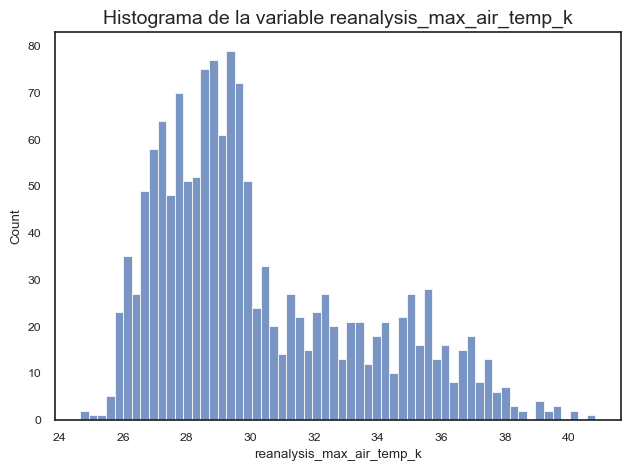

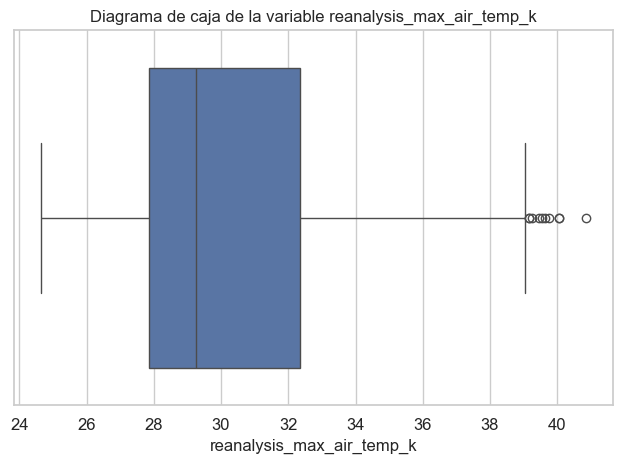

***Resumen de la variable***
1) Los datos no provienen de una distribución normal al nivel de significancia del 5%.
2) Skewness: 0.8449240115674093
 *Interpretación: La distribución tiene cola larga a la derecha (asimetría positiva).
 *Interpretación de la magnitud: Asimetría moderada. La distribución presenta cierta asimetría.
 *Recomendaciones: Considerar usar la mediana en lugar de la media. Se debe de verifica si hay outliers en el lado derecho.
3) Kurtosis: -0.1914904386800389
 *Interpretación: La distribución es platicúrtica (colas muy ligeras, valores extremos muy raros)
4) Se ha detectado 0 outliers en los datos
5) Datos resumidos de la variable
count    1456.000000
mean       30.272849
std         3.234180
min        24.650000
25%        27.850000
50%        29.250000
75%        32.350000
max        40.850000
Name: reanalysis_max_air_temp_k, dtype: float64


In [219]:
outlier = analysis_numeric_colum(df=df_temp_cleaned,col='reanalysis_max_air_temp_k')
outliers = pd.concat([outliers, pd.DataFrame(outlier,index=[0])], ignore_index=True)

#### Analizando la variable reanalysis_min_air_temp_k

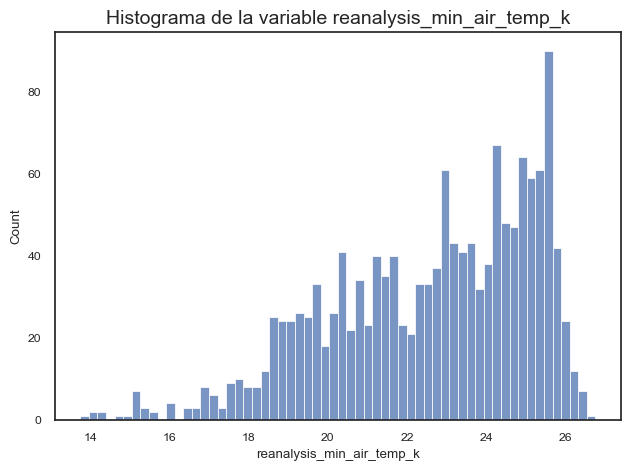

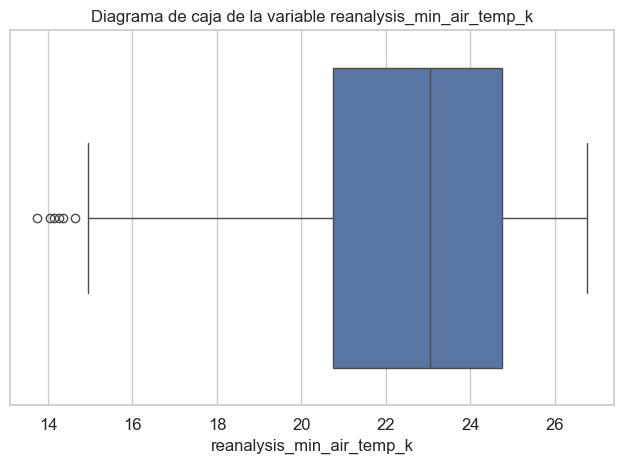

***Resumen de la variable***
1) Los datos no provienen de una distribución normal al nivel de significancia del 5%.
2) Skewness: -0.6736388141396523
 *Interpretación: La distribución tiene cola larga a la izquierda (asimetría negativa).
 *Interpretación de la magnitud: Asimetría moderada. La distribución presenta cierta asimetría.
 *Recomendaciones: Considerar  la mediana en lugar de la media. Se debe de verifica si hay outliers en el lado izquierdo.
3) Kurtosis: -0.2026651266677555
 *Interpretación: La distribución es platicúrtica (colas muy ligeras, valores extremos muy raros)
4) Se ha detectado 0 outliers en los datos
5) Datos resumidos de la variable
count    1456.000000
mean       22.568743
std         2.559557
min        13.750000
25%        20.750000
50%        23.050000
75%        24.750000
max        26.750000
Name: reanalysis_min_air_temp_k, dtype: float64


In [220]:
outlier = analysis_numeric_colum(df=df_temp_cleaned,col='reanalysis_min_air_temp_k')
outliers = pd.concat([outliers, pd.DataFrame(outlier,index=[0])], ignore_index=True)

#### Analizando la variable reanalysis_precip_amt_kg_per_m2

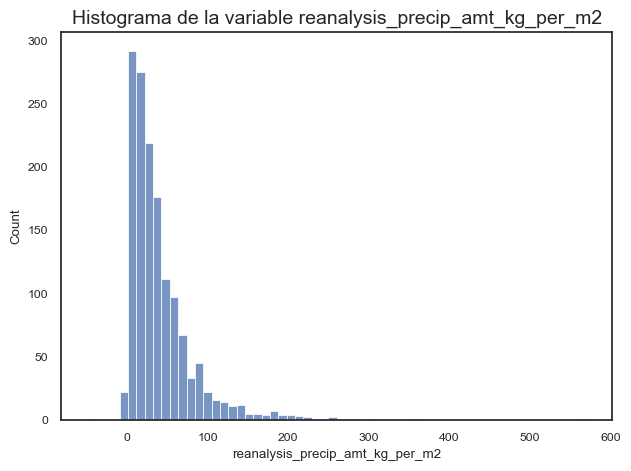

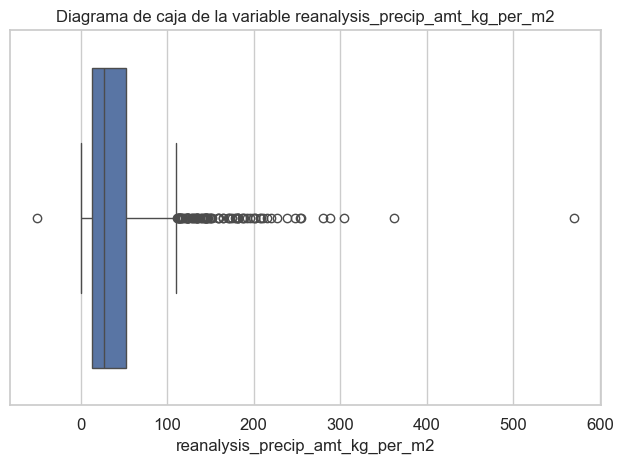

***Resumen de la variable***
1) Los datos no provienen de una distribución normal al nivel de significancia del 5%.
2) Skewness: 3.3756445627896037
 *Interpretación: La distribución tiene cola larga a la derecha (asimetría positiva).
 *Interpretación de la magnitud: Asimetría muy alta. La distribución es extremadamente sesgada.
 *Recomendaciones: Considerar usar la mediana en lugar de la media. Se debe de verifica si hay outliers en el lado derecho.
3) Kurtosis: 22.24720022983058
 *Interpretación: La distribución es leptocúrtica (colas muy gruesas, muchos outliers)
4) Se ha detectado 64 outliers en los datos
5) Datos resumidos de la variable
count    1456.000000
mean       40.059318
std        43.371931
min       -50.714958
25%        13.175000
50%        27.300000
75%        52.200000
max       570.500000
Name: reanalysis_precip_amt_kg_per_m2, dtype: float64


In [221]:
outlier = analysis_numeric_colum(df=df_temp_cleaned,col='reanalysis_precip_amt_kg_per_m2')
outliers = pd.concat([outliers, pd.DataFrame(outlier,index=[0])], ignore_index=True)

#### Analizando la variable reanalysis_relative_humidity_percent

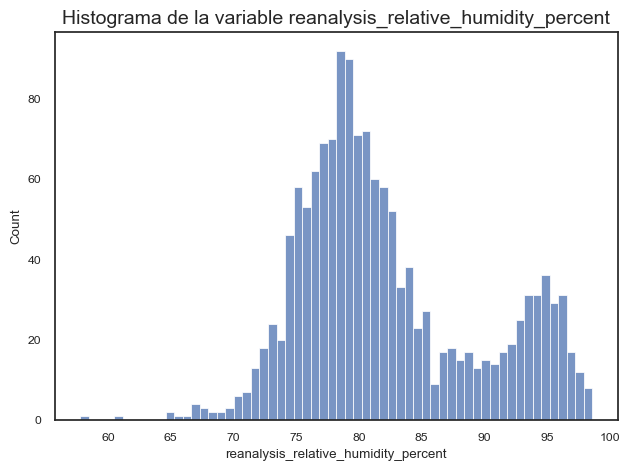

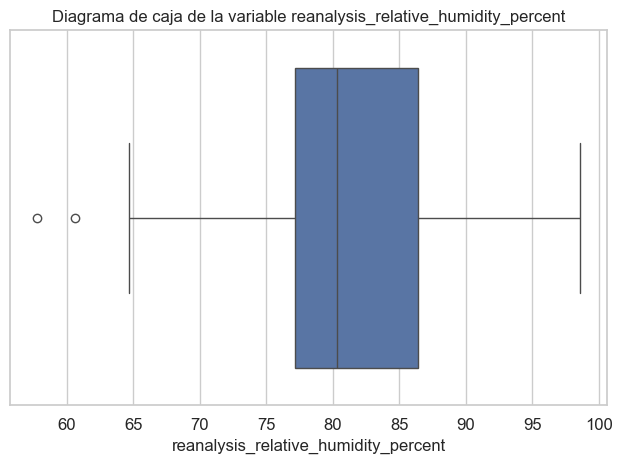

***Resumen de la variable***
1) Los datos no provienen de una distribución normal al nivel de significancia del 5%.
2) Skewness: 0.5757757056770372
 *Interpretación: La distribución tiene cola larga a la derecha (asimetría positiva).
 *Interpretación de la magnitud: Asimetría moderada. La distribución presenta cierta asimetría.
 *Recomendaciones: Considerar usar la mediana en lugar de la media. Se debe de verifica si hay outliers en el lado derecho.
3) Kurtosis: -0.38979378755429517
 *Interpretación: La distribución es platicúrtica (colas muy ligeras, valores extremos muy raros)
4) Se ha detectado 1 outliers en los datos
5) Datos resumidos de la variable
count    1456.000000
mean       82.171762
std         7.153021
min        57.787143
25%        77.196429
50%        80.301429
75%        86.406429
max        98.610000
Name: reanalysis_relative_humidity_percent, dtype: float64


In [222]:
outlier = analysis_numeric_colum(df=df_temp_cleaned,col='reanalysis_relative_humidity_percent')
outliers = pd.concat([outliers, pd.DataFrame(outlier,index=[0])], ignore_index=True)

#### Analizando la variable reanalysis_sat_precip_amt_mm

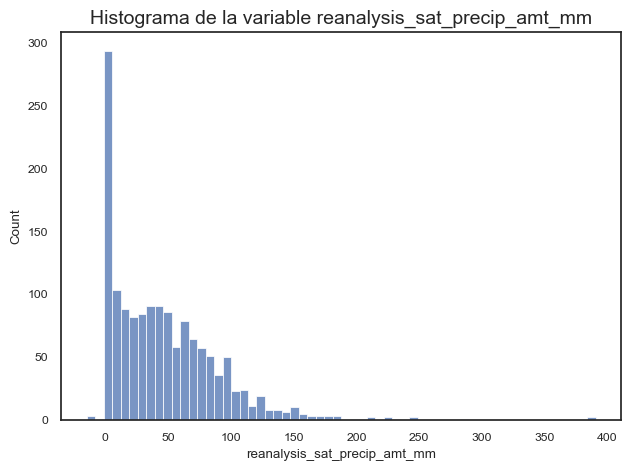

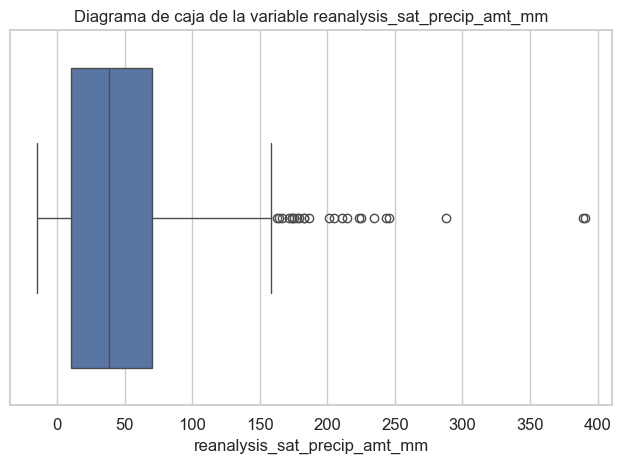

***Resumen de la variable***
1) Los datos no provienen de una distribución normal al nivel de significancia del 5%.
2) Skewness: 1.7213672260632218
 *Interpretación: La distribución tiene cola larga a la derecha (asimetría positiva).
 *Interpretación de la magnitud: Asimetría alta. La distribución es significativamente sesgada.
 *Recomendaciones: Considerar usar la mediana en lugar de la media. Se debe de verifica si hay outliers en el lado derecho.
3) Kurtosis: 6.674145793221134
 *Interpretación: La distribución es leptocúrtica (colas muy gruesas, muchos outliers)
4) Se ha detectado 12 outliers en los datos
5) Datos resumidos de la variable
count    1456.000000
mean       45.748840
std        43.776144
min       -14.802763
25%         9.760000
50%        38.475000
75%        70.227500
max       390.600000
Name: reanalysis_sat_precip_amt_mm, dtype: float64


In [223]:
outlier = analysis_numeric_colum(df=df_temp_cleaned,col='reanalysis_sat_precip_amt_mm')
outliers = pd.concat([outliers, pd.DataFrame(outlier,index=[0])], ignore_index=True)

#### Analizando la variable reanalysis_specific_humidity_g_per_kg

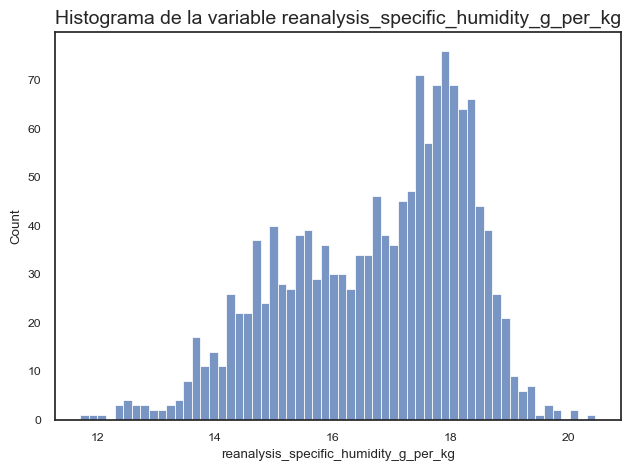

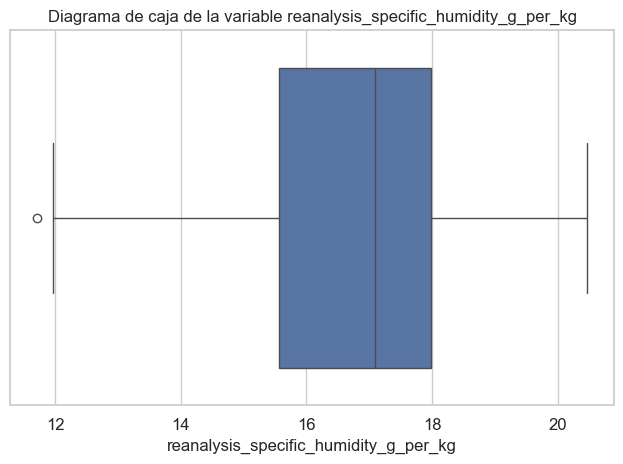

***Resumen de la variable***
1) Los datos no provienen de una distribución normal al nivel de significancia del 5%.
2) Skewness: -0.5380032604099435
 *Interpretación: La distribución tiene cola larga a la izquierda (asimetría negativa).
 *Interpretación de la magnitud: Asimetría moderada. La distribución presenta cierta asimetría.
 *Recomendaciones: Considerar  la mediana en lugar de la media. Se debe de verifica si hay outliers en el lado izquierdo.
3) Kurtosis: -0.4799848144782879
 *Interpretación: La distribución es platicúrtica (colas muy ligeras, valores extremos muy raros)
4) Se ha detectado 0 outliers en los datos
5) Datos resumidos de la variable
count    1456.000000
mean       16.746286
std         1.539676
min        11.715714
25%        15.560000
50%        17.084286
75%        17.977500
max        20.461429
Name: reanalysis_specific_humidity_g_per_kg, dtype: float64


In [224]:
outlier = outlier = analysis_numeric_colum(df=df_temp_cleaned,col='reanalysis_specific_humidity_g_per_kg')
outliers = pd.concat([outliers, pd.DataFrame(outlier,index=[0])], ignore_index=True)

#### Analizando la variable reanalysis_tdtr_k

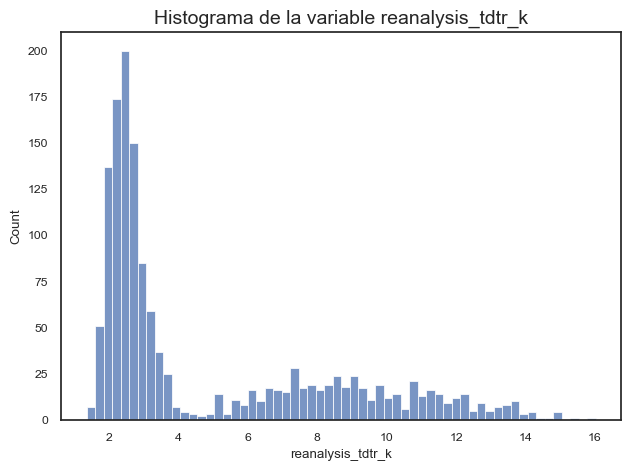

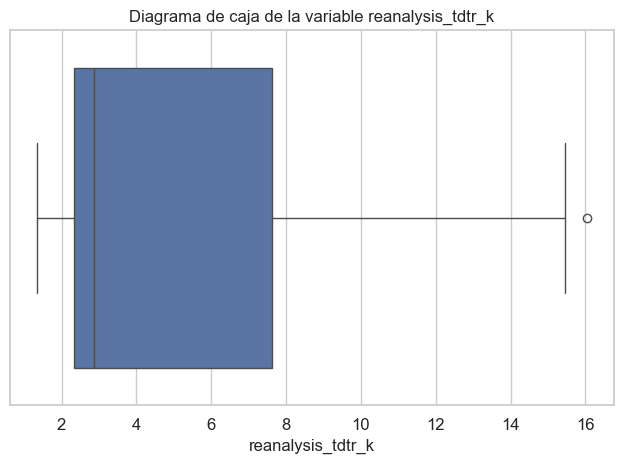

***Resumen de la variable***
1) Los datos no provienen de una distribución normal al nivel de significancia del 5%.
2) Skewness: 1.0691840524003864
 *Interpretación: La distribución tiene cola larga a la derecha (asimetría positiva).
 *Interpretación de la magnitud: Asimetría alta. La distribución es significativamente sesgada.
 *Recomendaciones: Considerar usar la mediana en lugar de la media. Se debe de verifica si hay outliers en el lado derecho.
3) Kurtosis: -0.20171751837243823
 *Interpretación: La distribución es platicúrtica (colas muy ligeras, valores extremos muy raros)
4) Se ha detectado 0 outliers en los datos
5) Datos resumidos de la variable
count    1456.000000
mean        4.902716
std         3.542331
min         1.357143
25%         2.328571
50%         2.857143
75%         7.632143
max        16.028571
Name: reanalysis_tdtr_k, dtype: float64


In [225]:
outlier = analysis_numeric_colum(df=df_temp_cleaned,col='reanalysis_tdtr_k')
outliers = pd.concat([outliers, pd.DataFrame(outlier,index=[0])], ignore_index=True)

#### Analizando la variable station_avg_temp_c

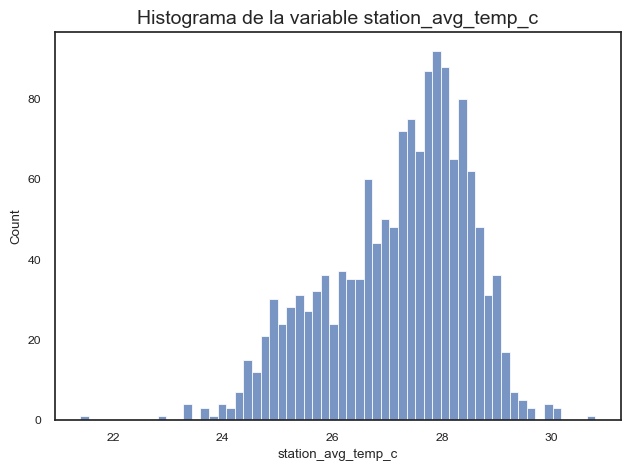

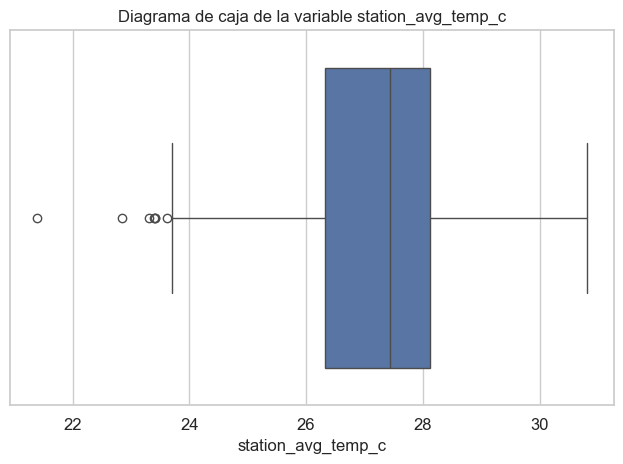

***Resumen de la variable***
1) Los datos no provienen de una distribución normal al nivel de significancia del 5%.
2) Skewness: -0.5918755312702665
 *Interpretación: La distribución tiene cola larga a la izquierda (asimetría negativa).
 *Interpretación de la magnitud: Asimetría moderada. La distribución presenta cierta asimetría.
 *Recomendaciones: Considerar  la mediana en lugar de la media. Se debe de verifica si hay outliers en el lado izquierdo.
3) Kurtosis: -0.06925492571302794
 *Interpretación: La distribución es platicúrtica (colas muy ligeras, valores extremos muy raros)
4) Se ha detectado 1 outliers en los datos
5) Datos resumidos de la variable
count    1456.000000
mean       27.194385
std         1.275857
min        21.400000
25%        26.328571
50%        27.434987
75%        28.128571
max        30.800000
Name: station_avg_temp_c, dtype: float64


In [226]:
outlier = analysis_numeric_colum(df=df_temp_cleaned,col='station_avg_temp_c')
outliers = pd.concat([outliers, pd.DataFrame(outlier,index=[0])], ignore_index=True)

#### Analizando la variable station_diur_temp_rng_c

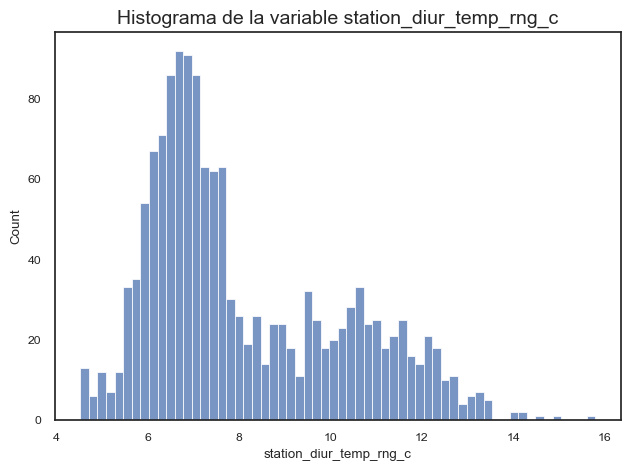

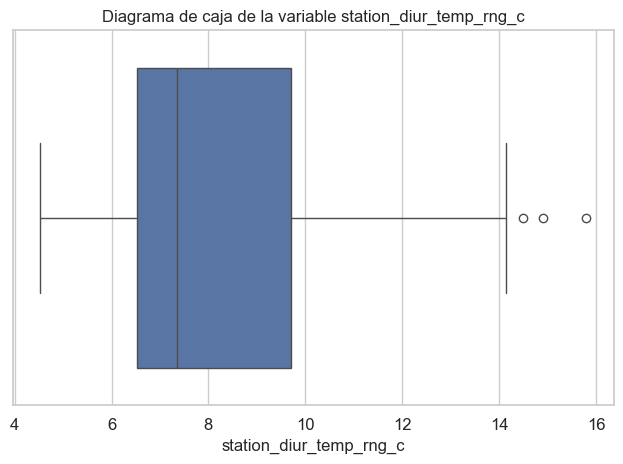

***Resumen de la variable***
1) Los datos no provienen de una distribución normal al nivel de significancia del 5%.
2) Skewness: 0.7815419558258575
 *Interpretación: La distribución tiene cola larga a la derecha (asimetría positiva).
 *Interpretación de la magnitud: Asimetría moderada. La distribución presenta cierta asimetría.
 *Recomendaciones: Considerar usar la mediana en lugar de la media. Se debe de verifica si hay outliers en el lado derecho.
3) Kurtosis: -0.3783842224002103
 *Interpretación: La distribución es platicúrtica (colas muy ligeras, valores extremos muy raros)
4) Se ha detectado 0 outliers en los datos
5) Datos resumidos de la variable
count    1456.000000
mean        8.110731
std         2.131590
min         4.528571
25%         6.528571
50%         7.350000
75%         9.706250
max        15.800000
Name: station_diur_temp_rng_c, dtype: float64


In [227]:
outlier = analysis_numeric_colum(df=df_temp_cleaned,col='station_diur_temp_rng_c')
outliers = pd.concat([outliers, pd.DataFrame(outlier,index=[0])], ignore_index=True)

#### Analizando la variable station_max_temp_c

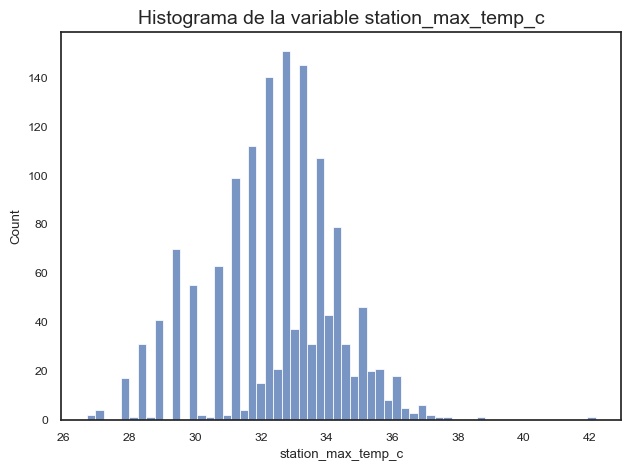

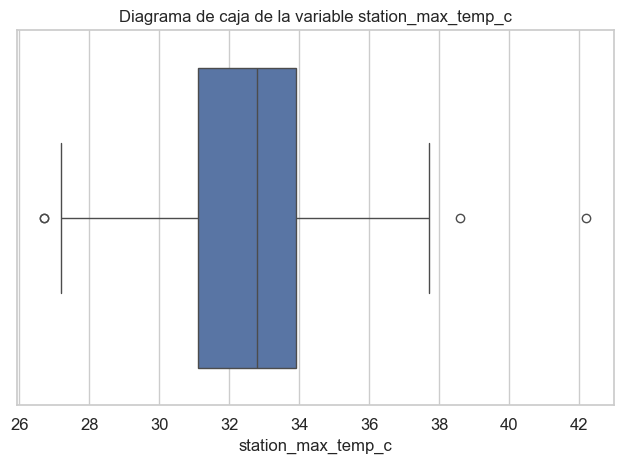

***Resumen de la variable***
1) Los datos no provienen de una distribución normal al nivel de significancia del 5%.
2) Skewness: -0.2682379176977294
 *Interpretación: La distribución tiene cola larga a la izquierda (asimetría negativa).
 *Interpretación de la magnitud: Asimetría baja. La distribución es casi simétrica.
 *Recomendaciones: Considerar  la mediana en lugar de la media. Se debe de verifica si hay outliers en el lado izquierdo.
3) Kurtosis: 0.1990582350324792
 *Interpretación: La distribución es platicúrtica (colas muy ligeras, valores extremos muy raros)
4) Se ha detectado 1 outliers en los datos
5) Datos resumidos de la variable
count    1456.000000
mean       32.454170
std         1.962616
min        26.700000
25%        31.100000
50%        32.800000
75%        33.900000
max        42.200000
Name: station_max_temp_c, dtype: float64


In [228]:
outlier = analysis_numeric_colum(df=df_temp_cleaned,col='station_max_temp_c')
outliers = pd.concat([outliers, pd.DataFrame(outlier,index=[0])], ignore_index=True)

#### Analizando la variable station_min_temp_c

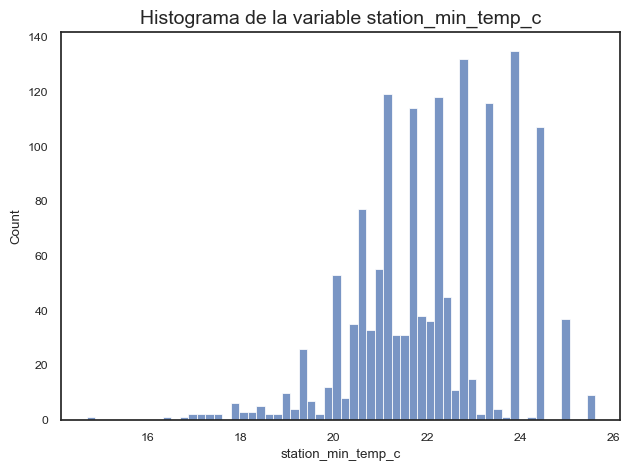

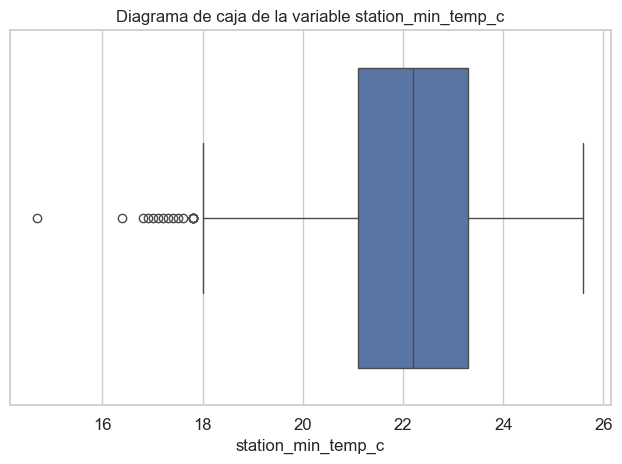

***Resumen de la variable***
1) Los datos no provienen de una distribución normal al nivel de significancia del 5%.
2) Skewness: -0.2993167400423782
 *Interpretación: La distribución tiene cola larga a la izquierda (asimetría negativa).
 *Interpretación de la magnitud: Asimetría baja. La distribución es casi simétrica.
 *Recomendaciones: Considerar  la mediana en lugar de la media. Se debe de verifica si hay outliers en el lado izquierdo.
3) Kurtosis: 0.23696040304674248
 *Interpretación: La distribución es platicúrtica (colas muy ligeras, valores extremos muy raros)
4) Se ha detectado 2 outliers en los datos
5) Datos resumidos de la variable
count    1456.000000
mean       22.096817
std         1.568410
min        14.700000
25%        21.100000
50%        22.200000
75%        23.300000
max        25.600000
Name: station_min_temp_c, dtype: float64


In [229]:
outlier = analysis_numeric_colum(df=df_temp_cleaned,col='station_min_temp_c')
outliers = pd.concat([outliers, pd.DataFrame(outlier,index=[0])], ignore_index=True)

#### Analizando la variable station_precip_mm

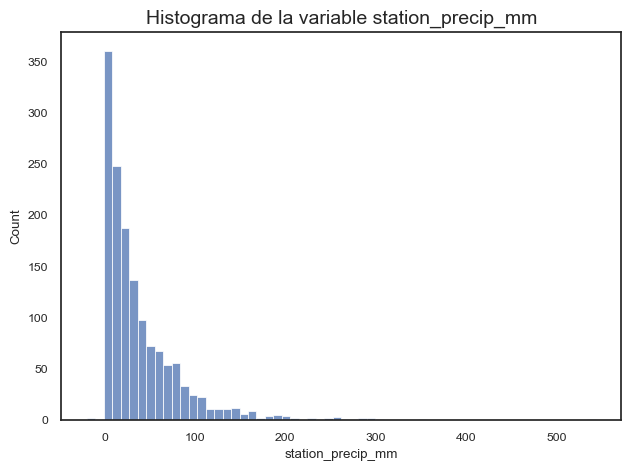

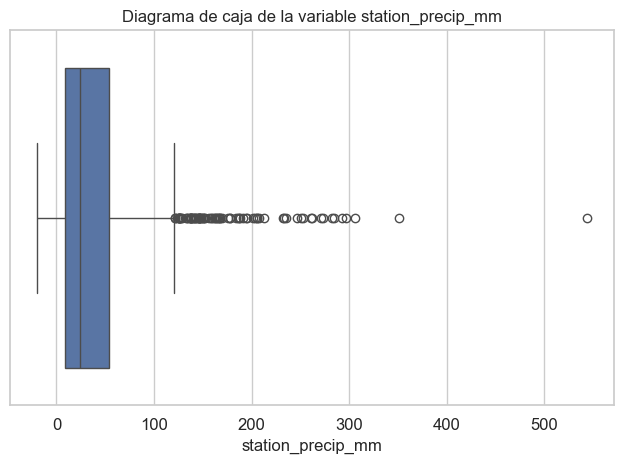

***Resumen de la variable***
1) Los datos no provienen de una distribución normal al nivel de significancia del 5%.
2) Skewness: 2.9755450284851612
 *Interpretación: La distribución tiene cola larga a la derecha (asimetría positiva).
 *Interpretación de la magnitud: Asimetría muy alta. La distribución es extremadamente sesgada.
 *Recomendaciones: Considerar usar la mediana en lugar de la media. Se debe de verifica si hay outliers en el lado derecho.
3) Kurtosis: 15.250711428569804
 *Interpretación: La distribución es leptocúrtica (colas muy gruesas, muchos outliers)
4) Se ha detectado 57 outliers en los datos
5) Datos resumidos de la variable
count    1456.000000
mean       39.240225
std        47.437844
min       -19.518595
25%         8.700000
50%        23.900000
75%        53.600000
max       543.300000
Name: station_precip_mm, dtype: float64


In [230]:
outlier = analysis_numeric_colum(df=df_temp_cleaned,col='station_precip_mm')
outliers = pd.concat([outliers, pd.DataFrame(outlier,index=[0])], ignore_index=True)

#### Analizando la variable week_start_date en función de la variable objetivo

C:\Users\jonat\AppData\Local\Temp\ipykernel_20432\614785588.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aux['week_start_date'] = pd.to_datetime(df_aux['week_start_date'])
C:\Users\jonat\AppData\Local\Temp\ipykernel_20432\614785588.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aux.sort_index(ascending=True, inplace=True)


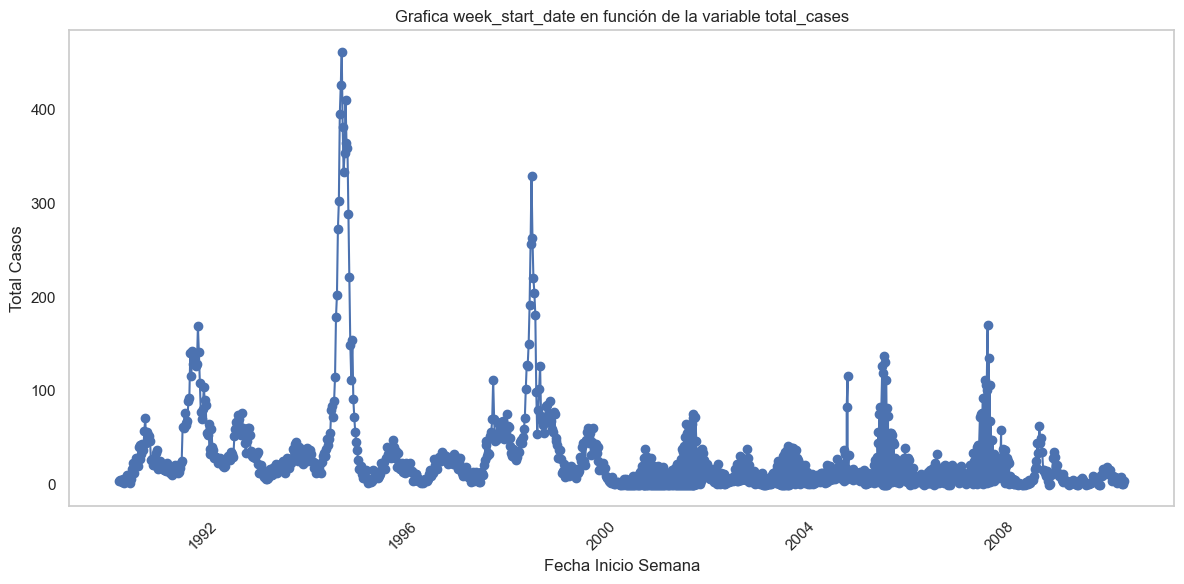

In [231]:
df_aux = df_temp_cleaned[['week_start_date','total_cases']]
# Convertir la columna 'Date' a tipo datetime
df_aux['week_start_date'] = pd.to_datetime(df_aux['week_start_date'])
# Establecer la columna 'Date' como índice
df_aux.set_index('week_start_date', inplace=True)
df_aux.sort_index(ascending=True, inplace=True)
plt.figure(figsize=(12, 6))
plt.plot(df_aux.index, df_aux['total_cases'], marker='o', linestyle='-', color='b')
plt.title('Grafica week_start_date en función de la variable total_cases')
plt.xlabel('Fecha Inicio Semana')
plt.ylabel('Total Casos')
plt.xticks(rotation=45)  # Rotar etiquetas del eje x
plt.grid()
plt.tight_layout()  # Ajustar el diseño
plt.show()

#### Resultados
Se observo de mejor maner la forma de cada una de la varibles de los datos y sus propiedades con el objetivo de conocer como esta la distribución de los datos, su forma y sus medidas de tendencia crentral

### Analisis bivariante
Se realiza el analisis bivariante para determinar si existe una asociación entre las variables y, en caso afirmativo, describir la naturaleza y el grado de esa relación. 

In [232]:
def graficar_series_tiempo(df, col_date, list_columns, col_target):
    """
    Función para graficar dos variables numéricas a lo largo del tiempo.
    
    Parámetros:
    - df: DataFrame que contiene las columnas de datos
    - col_date: La columna de tipo fecha
    - list_columns: Nombre de la columna que se esta analizando
    - col_target: Columna opbjetivo del analisis de los datos
    """
    if df.index.name != col_date:
        df[col_date]=pd.to_datetime(df[col_date])
        df=df.set_index(col_date)
        df = df.sort_index(ascending=True)
    
    for colum in list_columns:
        plt.figure(figsize=(14, 6))
        plt.plot(df.index, df[colum], label=colum,linestyle='-', color='b')
        plt.plot(df.index, df[col_target], label=col_target, linestyle='-', color='r')
    
        plt.title(f'Gráfico de series de tiempo para la variable {colum} y {col_target}'.format(colum = colum, col_target=col_target))
        plt.xlabel('Fecha')
        plt.ylabel('Valor')
        plt.xticks(rotation=45)  # Rotar etiquetas del eje x
        plt.legend(title='Etiquetas', fontsize=12, title_fontsize='13')  
        plt.grid(True)
        plt.tight_layout()  # Ajustar el diseño
    
        plt.show()

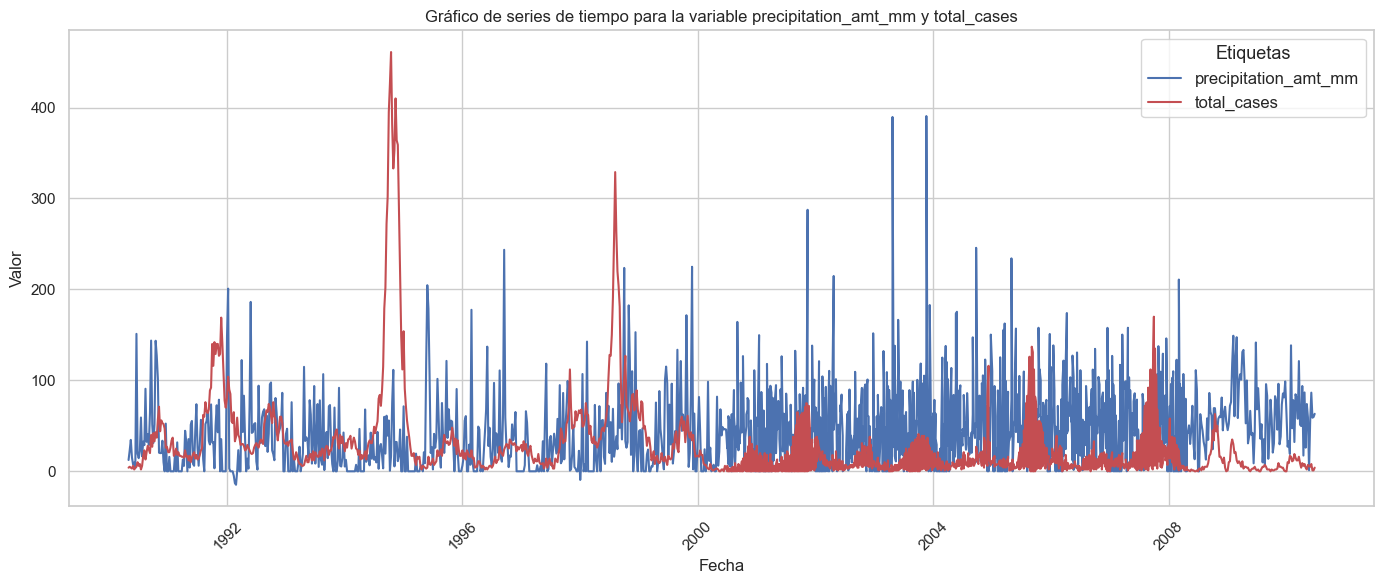

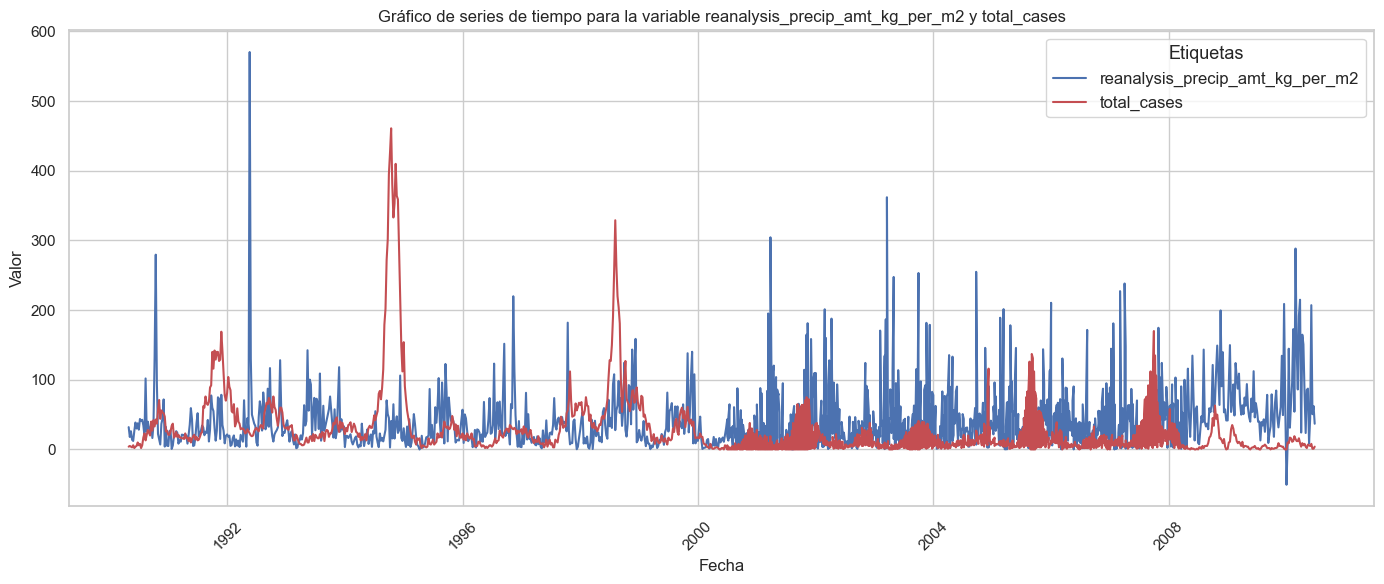

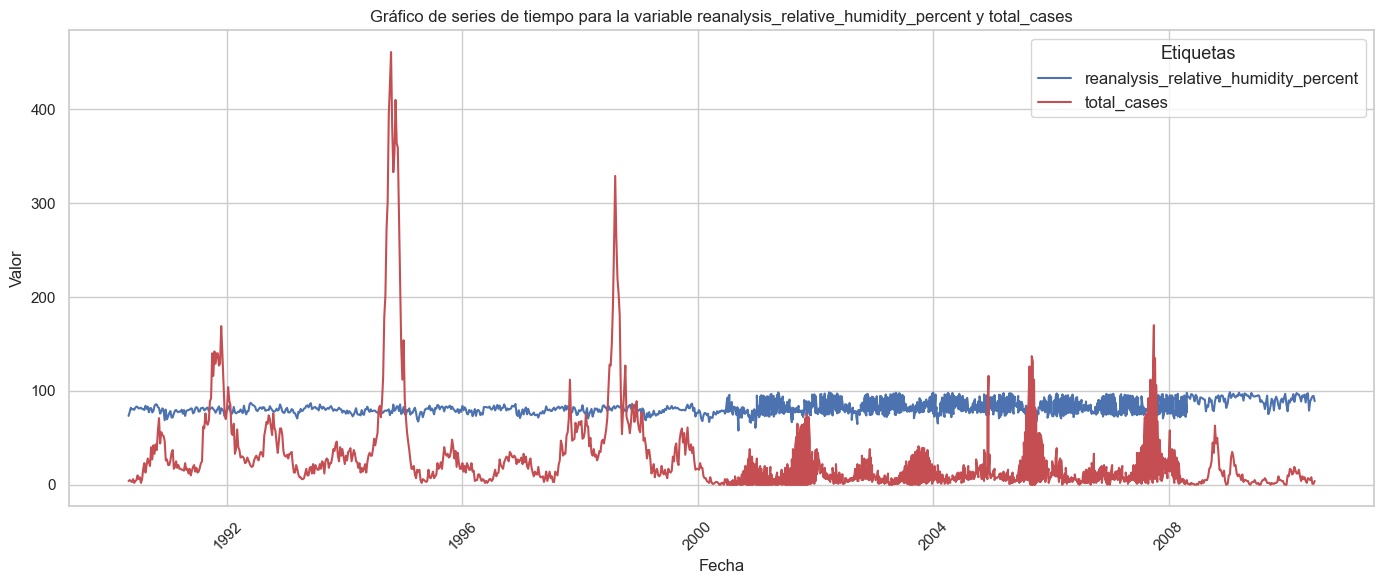

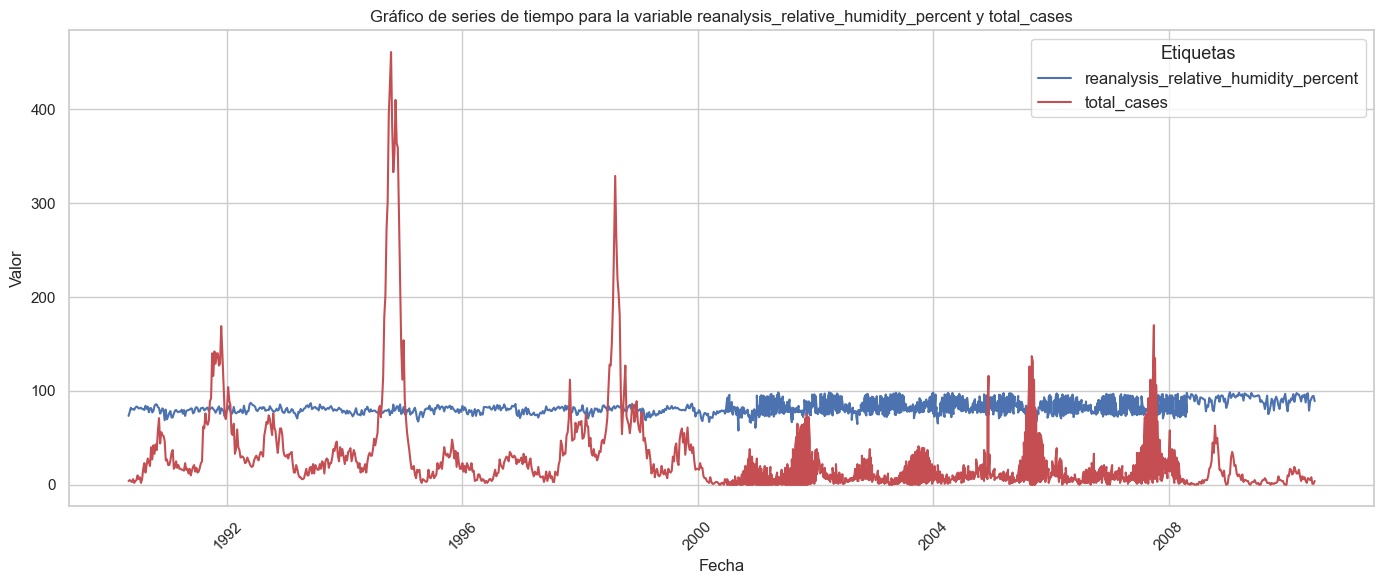

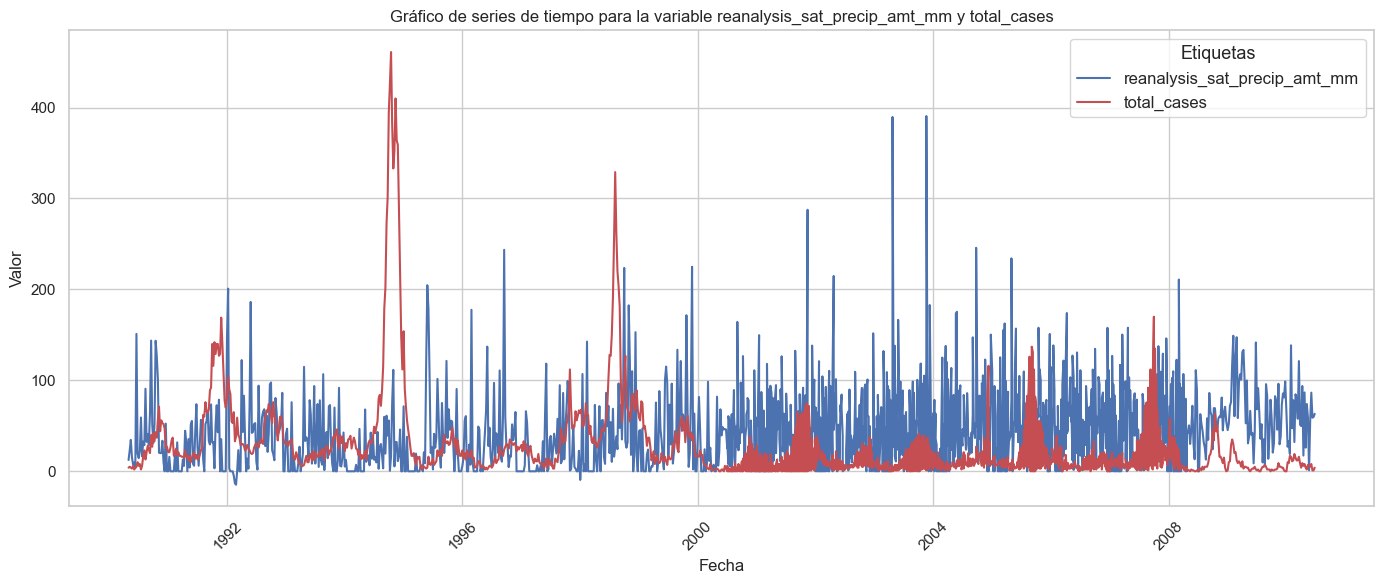

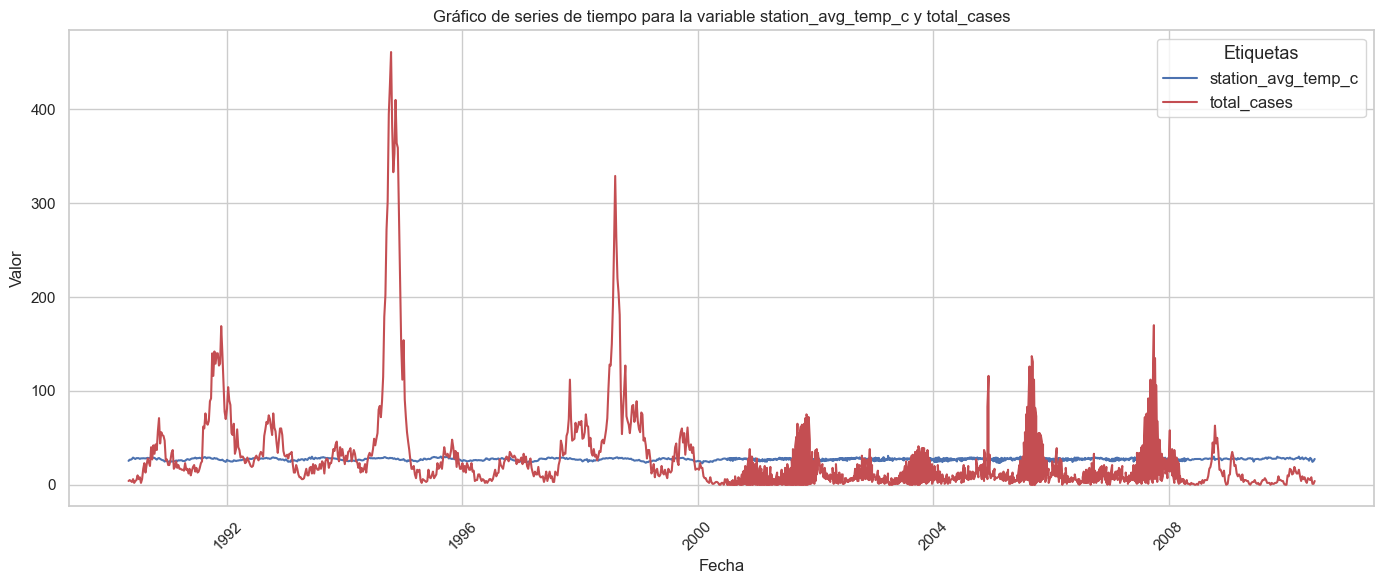

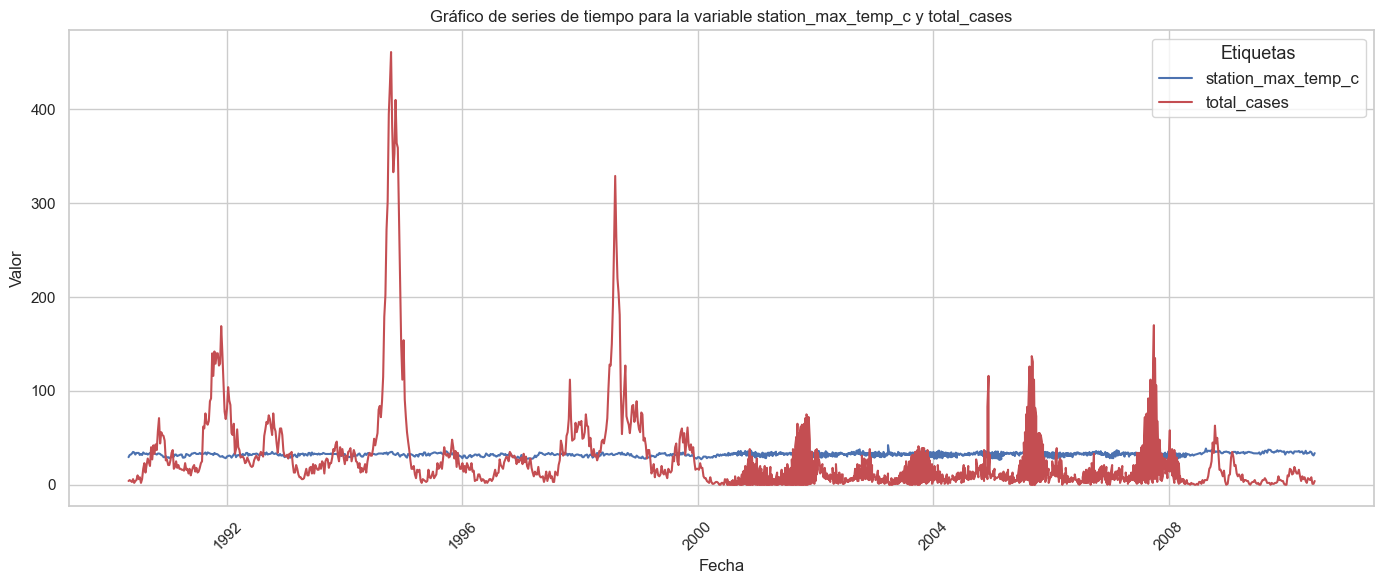

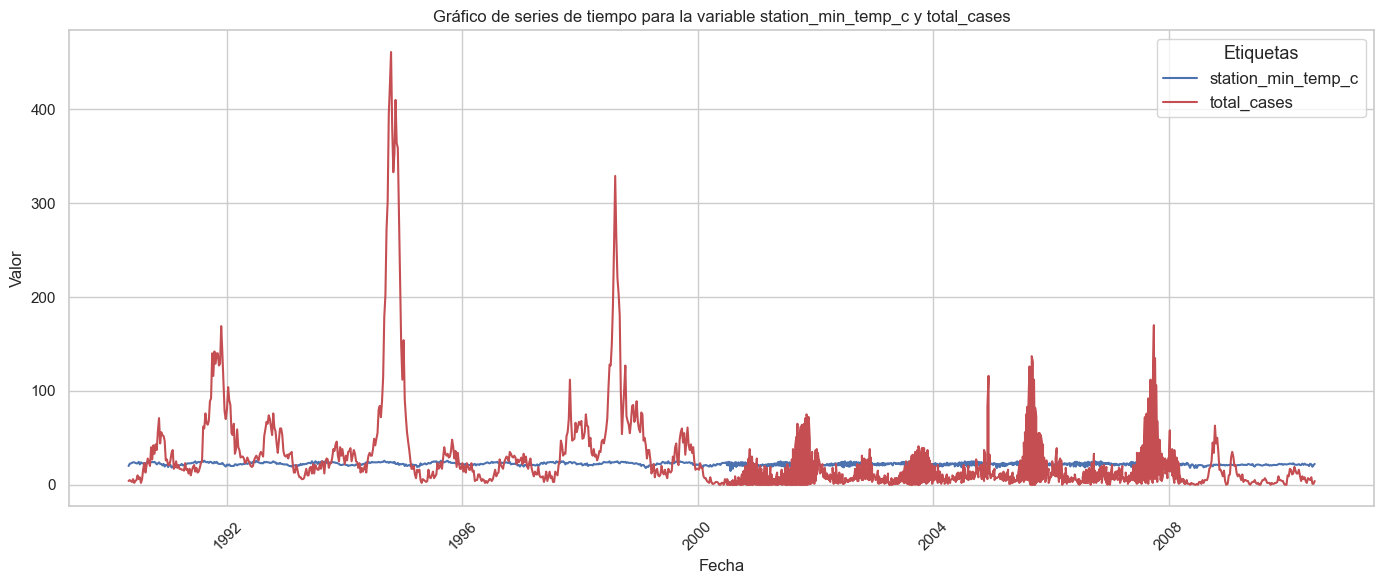

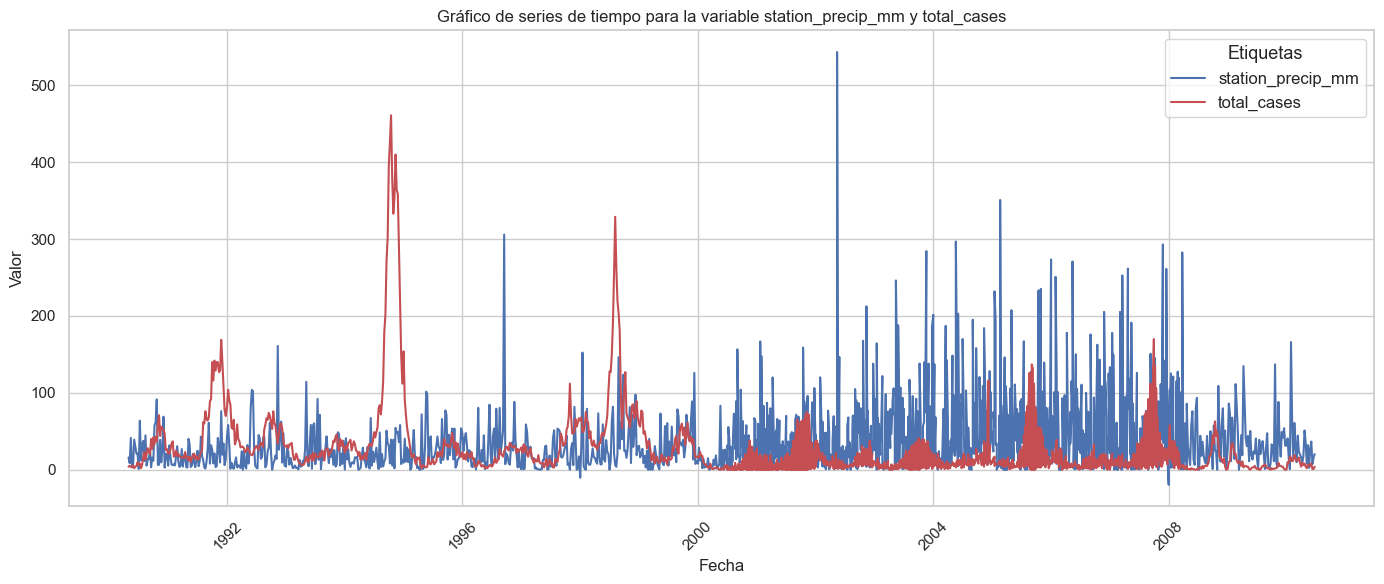

In [233]:
numerical_columns_outliers = ['precipitation_amt_mm','reanalysis_precip_amt_kg_per_m2','reanalysis_relative_humidity_percent','reanalysis_relative_humidity_percent',
                         'reanalysis_sat_precip_amt_mm','station_avg_temp_c','station_max_temp_c','station_min_temp_c','station_precip_mm']
graficar_series_tiempo(df_temp_cleaned,'week_start_date',numerical_columns_outliers, 'total_cases')

#### Resultados
En el analisis bivariante se observa como las variables van cambiando a lo largo del tiempo y como cambia el número total de casos reportados

### Detección de outliers en variables numericas continuas
Para realizar el analisis de los datos atipicos en las variables numericas continuas tambien se va a usar el rango intercuantilico, el cual es un método excelente para detectar valores atípicos en un conjunto de datos. \
El valor de k usado en este caso es de `k=2`, este valor es debido a que se tiene una gran cantidad de datos de diferente tipo y lo ideal es reducir la sensibilidad en este caso un 0.5, debido a que no son considerados como errores sino casos especiales de los datos.

In [234]:
#Se imprime las variables con outliers
var_outliers = outliers[outliers['num_outliers']>0]
var_outliers

,variable,num_outliers
0,ndvi_ne,1
1,ndvi_nw,2
2,ndvi_sw,11
3,precipitation_amt_mm,12
9,reanalysis_precip_amt_kg_per_m2,64
10,reanalysis_relative_humidity_percent,1
11,reanalysis_sat_precip_amt_mm,12
14,station_avg_temp_c,1
16,station_max_temp_c,1
17,station_min_temp_c,2


Las variables ndvi_ne, ndvi_nw, ndvi_sw al corresponder a (Normalized difference vegetation index) no se los considera como outliers en nuestros datos pero el resto de variables si son analizadas como cantidatas en la eliminación de outliers.

In [235]:
numerical_columns_outliers = ['precipitation_amt_mm','reanalysis_precip_amt_kg_per_m2','reanalysis_relative_humidity_percent','reanalysis_relative_humidity_percent',
                         'reanalysis_sat_precip_amt_mm','station_avg_temp_c','station_max_temp_c','station_min_temp_c','station_precip_mm']
detectar_outliers_var(df_temp_cleaned,input_columns=numerical_columns_outliers,k=2)

C:\Users\jonat\AppData\Local\Temp\ipykernel_20432\3372422898.py:139: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  outliers = pd.concat([outliers, outliers_col], axis=0)


,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
88,sj,1992,2,1992-01-08,0.100833,0.073575,0.138714,0.112786,200.85,24.762857,24.971429,21.307143,27.25,22.95,18.30,81.300000,200.85,15.878571,2.300000,25.657143,7.500000,30.6,20.6,58.2,104
264,sj,1995,21,1995-05-28,0.032200,0.162133,0.231829,0.240271,204.62,26.304286,26.428571,22.844286,28.55,24.15,17.30,81.447143,204.62,17.412857,2.328571,27.228571,7.342857,31.7,22.2,97.5,4
332,sj,1996,38,1996-09-16,0.033426,0.028450,0.150429,0.107817,243.55,26.332857,26.292857,23.730000,28.15,24.45,151.70,85.690000,243.55,18.407143,1.828571,27.042857,5.828571,31.7,22.8,305.9,24
438,sj,1998,40,1998-10-01,-0.002200,0.038200,0.161886,0.168314,223.61,27.447143,27.607143,23.388571,29.75,25.35,124.40,78.782857,223.61,18.061429,2.800000,27.914286,6.285714,32.8,23.9,24.7,102
498,sj,1999,47,1999-11-26,0.000500,0.071200,0.107700,0.088740,224.90,25.582857,25.728571,23.135714,27.65,23.95,140.20,86.405714,224.90,17.870000,1.900000,26.600000,4.528571,31.7,23.3,88.9,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1314,iq,2007,41,2007-10-08,0.385186,0.405071,0.310629,0.438129,39.09,26.425714,28.235714,22.297143,36.45,21.65,38.28,80.450000,39.09,17.010000,11.600000,28.400000,10.600000,34.2,21.8,145.1,11
1321,iq,2007,48,2007-11-26,0.165640,0.179300,0.127600,0.181914,129.33,24.730000,26.178571,24.067143,32.05,21.25,65.57,96.522857,129.33,18.924286,6.942857,27.125000,8.350000,32.3,22.4,293.1,9
1324,iq,2007,51,2007-12-17,0.269800,0.275686,0.275514,0.236714,146.13,23.991429,25.092857,23.247143,33.45,20.15,89.72,96.074286,146.13,18.034286,5.685714,27.625000,9.000000,32.9,22.4,261.3,26
1338,iq,2008,13,2008-03-25,0.336600,0.304214,0.322900,0.377314,62.13,23.944286,24.842857,22.798571,30.55,19.95,53.36,94.074286,62.13,17.507143,6.557143,26.900000,8.266667,31.7,22.6,282.7,6


Se decide eliminar las filas que tengan outliers debido a que se tiene solo 125 registros 

In [236]:
#Eliminación de los outliers del dataframe
df_cleaned = eliminar_outliers_iqr_multi(df_temp_cleaned,numerical_columns_outliers,2)
df_cleaned

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,24.422857,24.592857,19.264286,26.65,22.75,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,25.061429,25.292857,20.801429,27.75,23.25,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,25.631429,25.728571,22.284286,27.35,24.15,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,25.837143,26.078571,22.160000,28.25,23.85,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,26.368571,26.514286,22.671429,28.75,24.35,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1450,iq,2010,20,2010-05-21,0.263071,0.272500,0.258271,0.244500,1.15,24.498571,25.557143,20.077143,35.55,16.95,8.80,78.998571,1.15,14.908571,11.242857,25.633333,9.200000,34.0,20.0,2.5,6
1451,iq,2010,21,2010-05-28,0.342750,0.318900,0.256343,0.292514,55.30,26.184286,27.621429,23.675714,36.55,21.35,45.00,88.765714,55.30,18.485714,9.800000,28.633333,11.933333,35.4,22.4,27.0,5
1453,iq,2010,23,2010-06-11,0.247057,0.146057,0.250357,0.233714,58.94,23.448571,24.442857,22.351429,32.35,19.25,50.60,94.280000,58.94,17.008571,7.500000,24.400000,6.900000,32.2,19.2,7.4,1
1454,iq,2010,24,2010-06-18,0.333914,0.245771,0.278886,0.325486,59.67,23.195714,24.371429,22.174286,32.95,18.75,62.33,94.660000,59.67,16.815714,7.871429,25.433333,8.733333,31.2,21.0,16.0,1


De esta manera se ha eliminado los outliers del dataframe

### Integración y Transformación
Se realizan transformaciones, codificación necesarias de las variables

#### Códificación de variables categoricas
En este caso la variable categorica city se codifica a una variable numerica antes de aplicar algoritmos de machine learning

In [237]:
le = LabelEncoder()
df_transformed = df_cleaned.copy()
df_transformed['city'] = le.fit_transform(df_cleaned['city'])
# Ver las clases mapeadas por LabelEncoder
print('Las clases fueron mapeadas en este orden: ',le.classes_)
df_transformed

Las clases fueron mapeadas en este orden:  ['iq' 'sj']


,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,1,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,24.422857,24.592857,19.264286,26.65,22.75,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,1,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,25.061429,25.292857,20.801429,27.75,23.25,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,1,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,25.631429,25.728571,22.284286,27.35,24.15,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,1,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,25.837143,26.078571,22.160000,28.25,23.85,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,1,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,26.368571,26.514286,22.671429,28.75,24.35,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1450,0,2010,20,2010-05-21,0.263071,0.272500,0.258271,0.244500,1.15,24.498571,25.557143,20.077143,35.55,16.95,8.80,78.998571,1.15,14.908571,11.242857,25.633333,9.200000,34.0,20.0,2.5,6
1451,0,2010,21,2010-05-28,0.342750,0.318900,0.256343,0.292514,55.30,26.184286,27.621429,23.675714,36.55,21.35,45.00,88.765714,55.30,18.485714,9.800000,28.633333,11.933333,35.4,22.4,27.0,5
1453,0,2010,23,2010-06-11,0.247057,0.146057,0.250357,0.233714,58.94,23.448571,24.442857,22.351429,32.35,19.25,50.60,94.280000,58.94,17.008571,7.500000,24.400000,6.900000,32.2,19.2,7.4,1
1454,0,2010,24,2010-06-18,0.333914,0.245771,0.278886,0.325486,59.67,23.195714,24.371429,22.174286,32.95,18.75,62.33,94.660000,59.67,16.815714,7.871429,25.433333,8.733333,31.2,21.0,16.0,1


In [238]:
df_transformed.describe(percentiles=[.25, .50, .75, 1]).T.style.background_gradient()

,count,mean,min,25%,50%,75%,100%,max,std
city,1331.000000,0.679940,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.466675
year,1331.000000,2000.787378,1990.000000,1996.000000,2002.000000,2005.000000,2010.000000,2010.000000,5.425700
weekofyear,1331.000000,26.601052,1.000000,14.000000,27.000000,39.000000,53.000000,53.000000,14.912203
week_start_date,1331,2001-04-12 05:06:10.548459776,1990-04-30 00:00:00,1996-11-28 12:00:00,2002-02-05 00:00:00,2005-09-24 00:00:00,2010-06-25 00:00:00,2010-06-25 00:00:00,nan
ndvi_ne,1331.000000,0.127390,-0.406250,0.037656,0.107100,0.222721,0.508357,0.508357,0.133228
ndvi_nw,1331.000000,0.124026,-0.456100,0.047117,0.108400,0.207533,0.454429,0.454429,0.118178
ndvi_se,1331.000000,0.202028,-0.015533,0.155384,0.194583,0.243871,0.538314,0.538314,0.072912
ndvi_sw,1331.000000,0.199091,-0.063457,0.143807,0.185586,0.241793,0.546017,0.546017,0.082065
precipitation_amt_mm,1331.000000,40.628435,-14.802763,7.405000,33.820000,64.405000,182.810000,182.810000,37.051380
reanalysis_air_temp_k,1331.000000,25.613153,21.485714,24.565714,25.551429,26.739286,29.050000,29.050000,1.358084


In [239]:
df_transformed.columns

Index(['city', 'year', 'weekofyear', 'week_start_date', 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm', 'total_cases'],
      dtype='object')

#### Normalización de los datos
Se va a normalizar los datos de las variables númericas para que los algoritmos no se vean afectado por las escalas, para ello se va a usar RobustScaler que es util para manejar datos atipicos ayudando a manejar mejor los valores extremos de los datos, tomando en cuenta que algunos valores extremos que no eran incorrectos sino eran datos inusuales dentro del conjunto.

In [240]:
# Inicializar el RobustScaler
norm_columns = ['precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm']
dict_scaler = {} #Para guardar el escalado de los datos realizados
df_scaled = df_transformed
for col in norm_columns:
    scaler = RobustScaler()
    df_scaled[col] = scaler.fit_transform(df_transformed[[col]])
    dict_scaler[col]=scaler

# Ajustar y transformar los datos
df_scaled

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,1,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,-0.375439,-0.519224,-0.809524,-1.278173,-0.595238,-0.102564,0.217258,-0.874533,-0.375439,-1.182839,-0.028090,-1.056604,-0.112324,-1.259259,-1.000000,-0.136546,4
1,1,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,-0.192982,-0.225435,-0.450549,-0.639976,-0.333333,0.025641,-0.212974,-0.323500,-0.192982,-0.634610,-0.078652,-0.384906,-0.285491,-0.407407,0.000000,-0.334672,5
2,1,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,0.012632,0.036806,-0.227106,-0.024318,-0.428571,0.256410,0.036720,0.321337,0.012632,-0.039735,-0.092697,-0.384906,-0.248050,-0.222222,0.272727,0.543507,4
3,1,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,-0.323860,0.131449,-0.047619,-0.075919,-0.214286,0.179487,-0.336597,0.085152,-0.323860,-0.110567,-0.067416,0.015094,-0.154446,0.185185,0.500000,-0.457831,3
4,1,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,-0.461404,0.375945,0.175824,0.136418,-0.095238,0.307692,-0.388617,0.102065,-0.461404,0.105960,0.047753,0.792453,0.697348,0.814815,0.772727,-0.409639,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1450,0,2010,20,2010-05-21,0.263071,0.272500,0.258271,0.244500,-0.573158,-0.484390,-0.315018,-0.940688,1.523810,-1.589744,-0.492656,-0.099115,-0.573158,-0.821768,1.665730,-0.955975,0.641186,0.444444,-1.000000,-0.497992,6
1451,0,2010,21,2010-05-28,0.342750,0.318900,0.256343,0.292514,0.376842,0.291160,0.743590,0.553381,1.761905,-0.461538,0.615055,1.245428,0.376842,0.620213,1.382022,0.628931,1.536661,0.962963,0.090909,0.157965,5
1453,0,2010,23,2010-06-11,0.247057,0.146057,0.250357,0.233714,0.440702,-0.967466,-0.886447,0.003559,0.761905,-1.000000,0.786414,2.004523,0.440702,0.024762,0.929775,-1.607547,-0.112324,-0.222222,-1.363636,-0.366801,1
1454,0,2010,24,2010-06-18,0.333914,0.245771,0.278886,0.325486,0.453509,-1.083799,-0.923077,-0.069988,0.904762,-1.128205,1.145349,2.056834,0.453509,-0.052980,1.002809,-1.061635,0.488300,-0.592593,-0.545455,-0.136546,1


### Relación entre variables
Se realiza los test estadisticos para las diferentes variables con el objetivo de medir la relación entre las variables categoricas y numericas respecto a la variable objetivo.

#### Matriz de correlación para variables númericas
Una matriz de correlación es una tabla que muestra los coeficientes de correlación entre varias variables. Cada celda de la tabla muestra el valor de la correlación entre dos variables diferentes. Los coeficientes de correlación pueden variar entre -1 y 1, donde:

`1`: indica una correlación positiva perfecta. \
`-1`: indica una correlación negativa perfecta. \
`0`: indica que no hay correlación.

In [241]:
column_analisys = ['city', 'year', 'weekofyear', 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm', 'total_cases']
matriz_correlacion = df_scaled[column_analisys].corr()

# Extraer las correlaciones con la variable objetivo
correlacion_objetivo = matriz_correlacion['total_cases']

# Ordenar las correlaciones en orden descendente
correlacion_ordenada = correlacion_objetivo.sort_values(ascending=False)
correlacion_ordenada

total_cases                              1.000000
reanalysis_min_air_temp_k                0.313053
city                                     0.275733
station_min_temp_c                       0.264881
reanalysis_air_temp_k                    0.255953
weekofyear                               0.217587
reanalysis_dew_point_temp_k              0.154523
reanalysis_avg_temp_k                    0.149703
reanalysis_specific_humidity_g_per_kg    0.143423
station_avg_temp_c                       0.121811
reanalysis_precip_amt_kg_per_m2          0.042896
station_max_temp_c                      -0.024109
reanalysis_sat_precip_amt_mm            -0.040607
precipitation_amt_mm                    -0.040607
station_precip_mm                       -0.049826
reanalysis_relative_humidity_percent    -0.112957
ndvi_se                                 -0.142357
ndvi_nw                                 -0.149864
ndvi_sw                                 -0.164546
reanalysis_max_air_temp_k               -0.177765


Dado que se tiene que la variable objetivo no tiene una alta correlación de los datos se va a tomar el umbral como 0.25

In [242]:
# Definir el umbral de correlación
threshold = 0.25
# Seleccionar variables con correlación significativa
selected_variables = correlacion_ordenada[abs(correlacion_ordenada) > threshold].index.tolist()
# Excluir la variable objetivo
select_variables_with_target = selected_variables.copy()
selected_variables.remove('total_cases')
selected_variables

['reanalysis_min_air_temp_k',
 'city',
 'station_min_temp_c',
 'reanalysis_air_temp_k',
 'reanalysis_tdtr_k',
 'year']

##### Conclusión
Analisando los valores obtenidos en la matriz de correlación se pude observar que la variable objetivo tienen valores pequeños por tal motivo se va a seleccionar las variables aportan información a la predicción de la variable objetivo `total_cases` son `reanalysis_min_air_temp_k`,`city`,`station_min_temp_c`,`reanalysis_air_temp_k`,`reanalysis_tdtr_k`,`year`.

In [243]:
#Data frame luego de finalizar el preprocesado de los datos
df_preprocesed_clustering = df_scaled[selected_variables]
df_preprocesed = df_scaled[select_variables_with_target]

# Fase 4: Modelado

## Clustering
En analisis anteriores se selecciono la caracteristicas que aportan mayor información a la predicción de la variable objetivo en este caso se va a usar algoritmo de clustering de los datos para agrupar datos similares y descubrir patrones y relaciones de los datos. \
Este analisis se lo hace después de la selección de caracteristicas debido a la cantidad de variables, adicionalmente muchas de las variables no aportaban información para la variable predictora

### Visualización de los datos
Para visualizar como estan los datos de nuestro dataset se va a realizar un proceso de redución de dimensionalidad para ello se va a aplicar TSNE que es un método no lineal que se utiliza principalmente para visualizar datos de alta dimensionalidad en dos o tres dimensiones, mientras preserva las relaciones locales entre los puntos de datos.

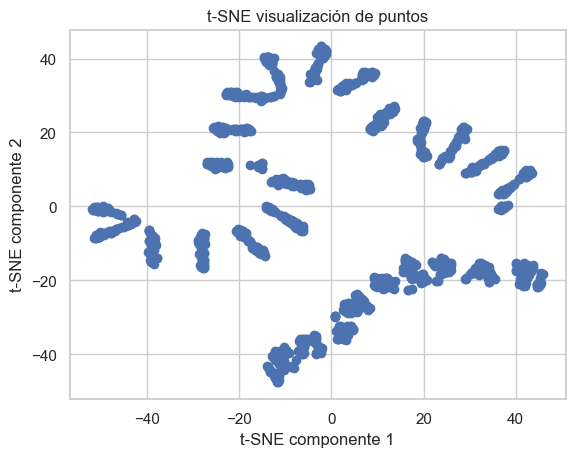

In [244]:
# Crear el modelo t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
# Reducir dimensionalidad
X_tsne = tsne.fit_transform(df_preprocesed_clustering)

# Visualizar en 2D (solo puntos)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1])
plt.title('t-SNE visualización de puntos')
plt.xlabel('t-SNE componente 1')
plt.ylabel('t-SNE componente 2')
plt.show()

### Analisis de clusters
Se analizan las técnicas de los clusteres aglomerativos, basado en particiones, jerarquico y probabilisticos

In [245]:
def elbow_method(X, max_k=10):
    """
    Calcula y grafica el método del codo para determinar el número óptimo de clústeres.

    Parámetros:
    - X: array-like, matriz de datos de entrada.
    - max_k: int, número máximo de clústeres a evaluar.

    Retorno:
    - inertia_values: lista de los valores de inercia para cada valor de k.
    """
    inertia_values = []
    k_values = range(1, max_k+1)  # Probar entre 1 y max_k clústeres

    # Calcular la inercia para cada valor de k
    for k in k_values:
        kmeans = cluster.KMeans(n_clusters=k, random_state=seed)
        kmeans.fit(X)
        inertia_values.append(kmeans.inertia_)

    # Graficar el método del codo
    plt.plot(k_values, inertia_values, marker='o')
    plt.xlabel('Número de Clústeres (k)')
    plt.ylabel('Inercia')
    plt.title('Método del Codo para encontrar el número óptimo de Clústeres')
    plt.show()


def cluster_ac(x, n_clusters):
    #Agrupa los objetos similares para formar un cluster que esta usando la distancia euclidiana para formar el cluster
    #Con linkage='ward' se utiliza la minimizacion de la variaza de dos clusters ward es para 2
    ac = cluster.AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
    #Se realiza el entrenamientio
    ac.fit(x)
    return ac.labels_

def cluster_kmeans(x, n_clusters):
    #Agrupa objetos basandose en la cantidad de clusters
    return cluster.k_means(x, n_clusters=n_clusters,random_state=seed)[1]

def calcular_silhouette(x, c):
    fig, ax = plt.subplots(1, 2, figsize=(20, 5), sharey=True)
    
    methodos = [cluster_ac, cluster_kmeans]
    for i, m in enumerate(methodos):
        res = []
        for c in range(2, 7):
            #Es la mejor manera de decidir el numero de clusters para los datos
            res += [silhouette_score(x, m(x, c))]
            
        ax[i].plot(range(2, 7), res)
        ax[i].set_xlabel("n clusters")
        ax[i].set_ylabel("silouhette score")
        ax[i].set_title('Agglomerative Clustering' if i==0 else "K-Means")
        
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata
        
def apply_gmm(X, max_clusters=10):
    """
    Aplica Gaussian Mixture Model (GMM) a los datos y usa el criterio de información bayesiano (BIC)
    para determinar el número óptimo de clústeres.

    Parámetros:
    - X: array-like, matriz de datos de entrada.
    - max_clusters: int, número máximo de clústeres a evaluar (para BIC).

    Retorno:
    - labels: etiquetas de los clústeres para los datos.
    - optimal_clusters: número óptimo de clústeres basado en BIC.
    - gmm: objeto ajustado de GaussianMixture.
    """
    # Evaluar BIC para determinar el número óptimo de clústeres
    bic_scores = []
    models = []
    k_values = range(1, max_clusters+1)

    for k in k_values:
        gmm = GaussianMixture(n_components=k, random_state=seed)
        gmm.fit(X)
        bic_scores.append(gmm.bic(X))
        models.append(gmm)

    # Graficar el BIC para diferentes valores de k
    plt.plot(k_values, bic_scores, marker='o')
    plt.xlabel('Número de Clústeres (k)')
    plt.ylabel('BIC Score')
    plt.title('Método de BIC para encontrar el número óptimo de Clústeres')
    plt.show()

    # Seleccionar el modelo con el menor BIC
    optimal_clusters = k_values[np.argmin(bic_scores)]
    optimal_gmm = models[np.argmin(bic_scores)]

    # Predecir las etiquetas de los clústeres usando el mejor modelo
    labels = optimal_gmm.predict(X)
    print(f'El valor optimo de clusters es: {optimal_clusters}'.format(optimal_clusters=optimal_clusters))

    return labels, optimal_gmm
        

def plot_cluster(data_tsne,labels):
    """
    Graficar los clusters de los datos

    Parámetros:
    - data_tsne: array-like, matriz de datos de entrada.
    - labels: etiquetas de los clusters

    """
    # plot the cluster assignments
    plt.scatter(data_tsne[:, 0], data_tsne[:, 1], c=labels, cmap='jet')
    plt.xlabel("Feature 0")
    plt.ylabel("Feature 1")


#### Analisis de la cantidad de clusters
Se analizan la cantidadd de cluster a ser los optimos en base a las técnicas de los clusteres aglomerativos, basado en particiones, jerarquico y probabilisticos con el objetivo de ver cual es el mejor valor de clusters a utilizar dentro de nuestro analisis de los datos.

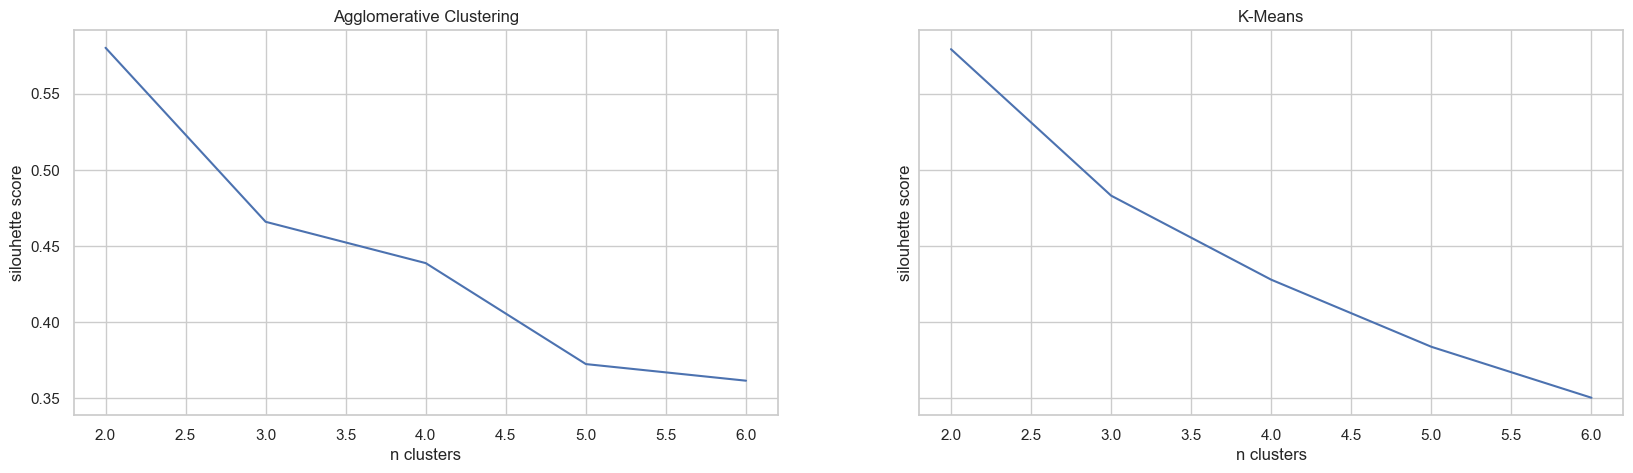

In [246]:
clusters = df_preprocesed_clustering.to_numpy()[:, -1]
calcular_silhouette(df_preprocesed_clustering, clusters)

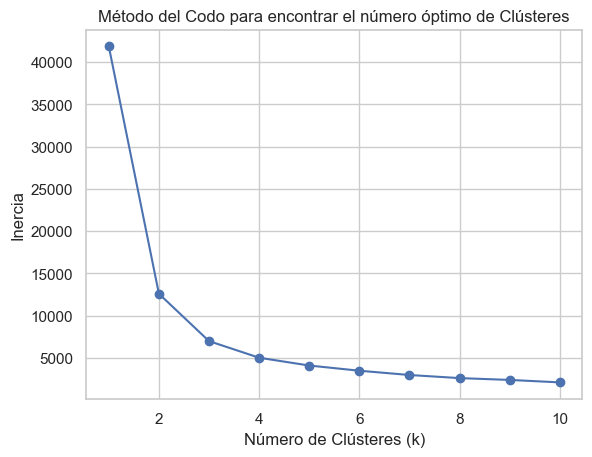

In [247]:
elbow_method(df_preprocesed_clustering)

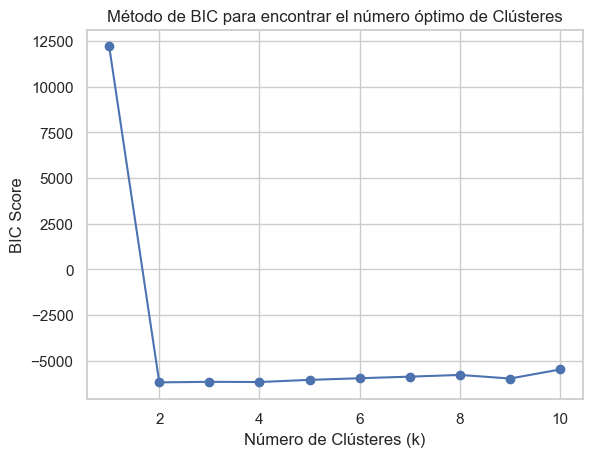

El valor optimo de clusters es: 2


In [248]:
# Aplicar la función para encontrar el número óptimo de clústeres y obtener los clústeres
labels_gmm, gmm = apply_gmm(df_preprocesed_clustering, max_clusters=10)

De los tipos de clusters analizado anteriormente se realiza el grafico correspondiente con 2 clusters de los datos que es el valor obtenido en la evaluación de cada uno de los métodos anteriormente analizados.

##### Grafico de los datos con K-means

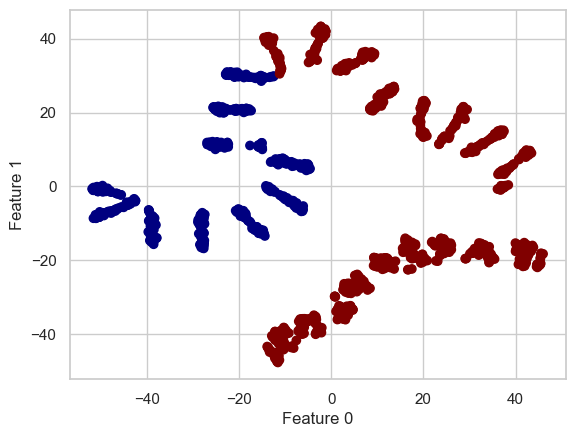

In [249]:
tsne_k_means = cluster_kmeans(df_preprocesed_clustering,2)
plot_cluster(X_tsne,tsne_k_means)

##### Grafico de los datos con cluster aglomerativo

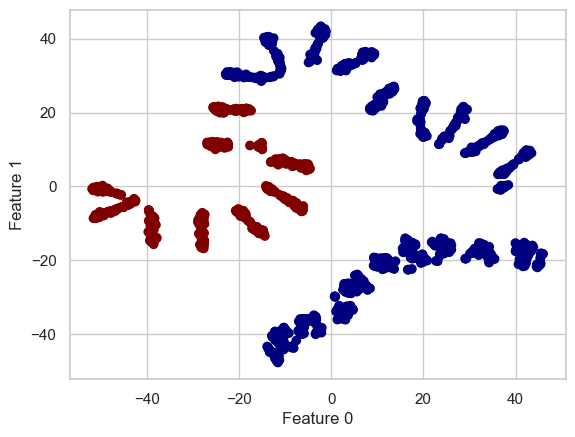

In [250]:
tsne_aglomeartive_clustering = cluster_ac(df_preprocesed_clustering,2)
plot_cluster(X_tsne,tsne_aglomeartive_clustering)

##### Grafico de los datos con Gaussian Mixture Model

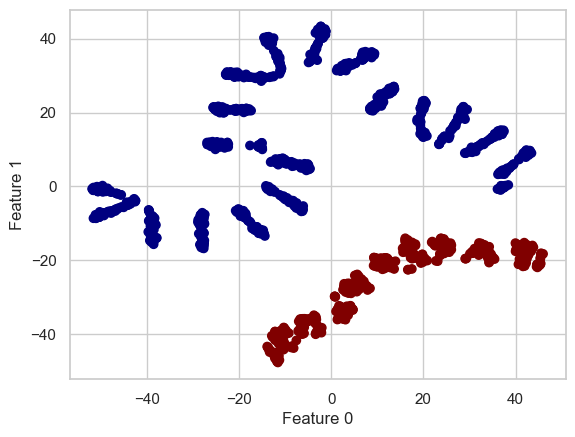

In [251]:
plot_cluster(X_tsne,labels_gmm)

##### Resultados
En todos los casos empleados para seleccionar el mejor valor de los clusters se obtiene el valor de 2 tanto para el cluster Aglomerativo, K-means, Gaussian Mixture Model que se los ha considerado como candidatos en esta selección del mejor modelo de clustering, en este caso no se considero el modelo jerarquico debido a que al ser una forma bastante compleja la cantidad de clusters que nos daria no seria la adecuada pues empezaria a marcar muchos como ruido dada la forma compleja que se tiene. \
Del analisis anterior tambien se puede visualizar que el método de clustering que mejor agrupo los datos es Gaussian Mixture Model pues es especialmente útil cuando los datos no tienen una forma cilindrica que con la ayuda de la TSNE se pude visualizar dicho caso.

### Clustering de los datos
Se utiliza el método Gaussian Mixture Model para realizar la clusterización de los datos y obtener algun patron de la agrupación de los datos

In [252]:
df_clustering = df_preprocesed_clustering.copy()
df_clustering['cluster'] = labels_gmm
df_clustering.head(20)

,reanalysis_min_air_temp_k,city,station_min_temp_c,reanalysis_air_temp_k,reanalysis_tdtr_k,year,cluster
0,-0.102564,1,-1.000000,-0.519224,-0.028090,1990,0
1,0.025641,1,0.000000,-0.225435,-0.078652,1990,0
2,0.256410,1,0.272727,0.036806,-0.092697,1990,0
3,0.179487,1,0.500000,0.131449,-0.067416,1990,0
4,0.307692,1,0.772727,0.375945,0.047753,1990,0
5,0.461538,1,0.772727,0.427210,-0.132022,1990,0
6,0.358974,1,0.500000,0.232665,-0.143258,1990,0
7,0.538462,1,0.272727,0.409464,-0.235955,1990,0
8,0.358974,1,0.272727,0.403549,-0.174157,1990,0
9,0.615385,1,1.000000,0.668419,-0.148876,1990,0


In [253]:
df_cluster_0 = df_clustering[df_clustering['cluster']==0]
df_cluster_1 = df_clustering[df_clustering['cluster']==1]

In [254]:
df_cluster_0.describe()

,reanalysis_min_air_temp_k,city,station_min_temp_c,reanalysis_air_temp_k,reanalysis_tdtr_k,year,cluster
count,905.000000,905.0,905.000000,905.000000,905.000000,905.000000,905.0
mean,0.256200,1.0,0.177790,0.213752,-0.049102,1998.826519,0.0
std,0.335105,0.0,0.689542,0.572761,0.097547,5.215888,0.0
min,-0.948718,1.0,-2.000000,-1.271114,-0.269663,1990.000000,0.0
25%,0.000000,1.0,-0.227273,-0.234637,-0.120787,1994.000000,0.0
50%,0.307692,1.0,0.272727,0.254354,-0.061798,1999.000000,0.0
75%,0.538462,1.0,0.772727,0.665790,0.005618,2003.000000,0.0
max,0.923077,1.0,1.545455,1.609596,0.325843,2008.000000,0.0


In [255]:
df_cluster_1.describe()

,reanalysis_min_air_temp_k,city,station_min_temp_c,reanalysis_air_temp_k,reanalysis_tdtr_k,year,cluster
count,426.000000,426.0,426.000000,426.000000,426.000000,426.000000,426.0
mean,-0.904356,0.0,-0.483953,-0.365371,1.318561,2004.953052,1.0
std,0.431456,0.0,0.551942,0.543452,0.475845,2.945410,0.0
min,-2.410256,0.0,-2.454545,-1.870523,0.320225,2000.000000,1.0
25%,-1.128205,0.0,-0.772727,-0.733487,0.931180,2002.000000,1.0
50%,-0.871795,0.0,-0.454545,-0.386461,1.278090,2005.000000,1.0
75%,-0.564103,0.0,-0.136364,-0.001150,1.665028,2008.000000,1.0
max,-0.076923,0.0,0.909091,1.350641,2.606742,2010.000000,1.0


#### Interpretación de los resultados del clustering
En el `cluster 0` se tienen los siguientes datos que caracterizan al cluster
- Registros: Se obtienen 905 registros en el cluster
- Campos con valores predominantes
    * city: el valor que predomina es de la ciudad con la codificación 1
    * reanalysis_tdtr_k: la columna muestra valores con rangos caracteristicos de los clusters con un valor mínimo de -0.269663 y máximo de 0.325843


En el `cluster 1` se tienen los siguientes datos que caracterizan al cluster
- Registros: Se obtienen 426 registros en el cluster
- Campos con valores predominantes
    * city: el valor que predomina es de la ciudad con la codificación 0
    * reanalysis_tdtr_k: la columna muestra valores con rangos caracteristicos de los clusters con un valor mínimo de 0.320225 y máximo de 2.606742

El campo `ciudad` es caracteristico debido a que al ser de dos ciudades diferentes el cluster los pudo diferenciar de manera clara pero el atributo `reanalysis_tdtr_k` hace referencia a rango de temperatura diurna (Diurnal Temperature Range, DTR), el cual se refiere a la diferencia entre la temperatura máxima y la temperatura mínima en un periodo de 24 horas. Este indicador es importante en climatología y meteorología porque proporciona información sobre la variabilidad diaria de la temperatura una de las condiciones clave para el desarrollo de los moscos que trasmiten la enfermedad.

#### Analisis de los clusters obtenidos y la variable objetivo


In [256]:
dengue_d_cluster = pd.DataFrame(pd.concat([df_clustering, df_preprocesed], axis=1, join='inner'))
dengue_d_cluster = dengue_d_cluster.loc[:, ~dengue_d_cluster.columns.duplicated()]

In [257]:
df_cluster_0_target = dengue_d_cluster[dengue_d_cluster['cluster']==0]
df_cluster_1_target = dengue_d_cluster[dengue_d_cluster['cluster']==1]

In [258]:
df_cluster_0_target.describe()

,reanalysis_min_air_temp_k,city,station_min_temp_c,reanalysis_air_temp_k,reanalysis_tdtr_k,year,cluster,total_cases
count,905.000000,905.0,905.000000,905.000000,905.000000,905.000000,905.0,905.000000
mean,0.256200,1.0,0.177790,0.213752,-0.049102,1998.826519,0.0,34.004420
std,0.335105,0.0,0.689542,0.572761,0.097547,5.215888,0.0,51.673541
min,-0.948718,1.0,-2.000000,-1.271114,-0.269663,1990.000000,0.0,0.000000
25%,0.000000,1.0,-0.227273,-0.234637,-0.120787,1994.000000,0.0,9.000000
50%,0.307692,1.0,0.272727,0.254354,-0.061798,1999.000000,0.0,19.000000
75%,0.538462,1.0,0.772727,0.665790,0.005618,2003.000000,0.0,37.000000
max,0.923077,1.0,1.545455,1.609596,0.325843,2008.000000,0.0,461.000000


In [259]:
df_cluster_1_target.describe()

,reanalysis_min_air_temp_k,city,station_min_temp_c,reanalysis_air_temp_k,reanalysis_tdtr_k,year,cluster,total_cases
count,426.000000,426.0,426.000000,426.000000,426.000000,426.000000,426.0,426.000000
mean,-0.904356,0.0,-0.483953,-0.365371,1.318561,2004.953052,1.0,7.525822
std,0.431456,0.0,0.551942,0.543452,0.475845,2.945410,0.0,11.293331
min,-2.410256,0.0,-2.454545,-1.870523,0.320225,2000.000000,1.0,0.000000
25%,-1.128205,0.0,-0.772727,-0.733487,0.931180,2002.000000,1.0,1.000000
50%,-0.871795,0.0,-0.454545,-0.386461,1.278090,2005.000000,1.0,4.000000
75%,-0.564103,0.0,-0.136364,-0.001150,1.665028,2008.000000,1.0,9.000000
max,-0.076923,0.0,0.909091,1.350641,2.606742,2010.000000,1.0,116.000000


### Conclusiones
En el análisis del dataset, se analizaron los datos desde un punto de vista técnico, teniendo en cuenta el significado de cada variable dentro del conjunto de datos. Se convirtió la temperatura de grados Kelvin a grados centígrados (°C) para llevar a una escala de medición única, con el objetivo de interpretar los resultados de mejor manera en el análisis univariado y bivariado. 

En el preprocesamiento de los datos, se tomó la decisión de eliminar los outliers en lugar de completarlos con valores como la media, la mediana o la moda, dependiendo de la variable. Esta decisión se basa en que los datos que se alejan significativamente del análisis intercuartílico no deben ser llenados, ya que esto no es ideal para evitar sobreajustes. Además, la cantidad de registros no era muy representativa con respecto a la cantidad total de datos. 

El clustering se caracteriza por agrupar datos similares en grupos, pero en este dataset hay muchas características. Por lo tanto, era necesario seleccionar solo aquellas características que aportaran información relevante sobre la predicción de la variable objetivo total_cases. Esto hizo necesario realizar un paso previo de selección de características y, a su vez, normalizarlas para transformar los datos y ajustarlos a una escala común sin distorsionar las diferencias en los rangos de valores. Después del procedimiento mencionado, se tomaron en cuenta los clusters Aglomerativo, K-means y Gaussian Mixture Model, que fueron considerados como candidatos. En este caso, no se consideró el modelo jerárquico debido a que, al ser una forma compleja (empleando la técnica de reducción de dimensionalidad T-SNE), la cantidad de clusters marcaba muchos como ruido dada su forma. 

Finalmente, los resultados obtenidos del clustering revelan la existencia de dos grupos bien diferenciados, con variables clave como `city` y `reanalysis_tdtr_k`, que permiten distinguir claramente estos clusters. En particular, la ciudad de `San Juan` ha mostrado la mayor variabilidad diaria en la temperatura. Además, al comparar la distribución de los casos reportados entre los clusters, se observa que el `cluster 1` presenta una menor cantidad de casos en comparación con el `cluster 0`. Esta información resulta valiosa para comprender la relación entre la variabilidad climática y la incidencia de los casos. Sin embargo, contar con un mayor volumen de datos sobre estas ciudades sería fundamental para mejorar el análisis y establecer predicciones más precisas.


# Fase 5: Evaluación y Despliegue

## Evaluación del Modelo
Evaluar el modelo final utilizando métricas de rendimiento como precisión, recall y F1-score, asegurando que cumpla con los criterios de éxito definidos en la fase de definición del problema.

No realizado hasta la actividad planteada

# Referencias 
El código ha sido elaborado de parte propia con la ayuda de chatgpt 